In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Anantapur']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
0,0,14.08,77.69,Anantapur,Penukonda,Gonipeta,Mixed soil,6.19,0.07,0.18,...,0.17,8.89,0.51,15.24,0.066779,0.035485,0.203906,0.183342,-0.083973,G.Nut
1,1,14.09,77.69,Anantapur,Penukonda,Gonipeta,Redsoil,8.40,0.33,0.31,...,0.57,3.24,0.44,6.90,0.074064,0.039668,0.211340,0.210912,-0.095396,G.Nut
2,2,14.09,77.69,Anantapur,Penukonda,Gonipeta,Mixed soil,7.10,0.11,0.17,...,0.19,5.54,0.42,8.34,0.074064,0.039668,0.211340,0.210912,-0.095396,G.Nut
3,3,14.10,77.70,Anantapur,Penukonda,Gonipeta,Sandi soil,8.30,0.21,0.20,...,0.21,1.79,0.67,4.17,0.079518,0.041296,0.211175,0.220463,-0.099287,Horsegram
4,4,14.09,77.69,Anantapur,Penukonda,Gonipeta,Mixed soil,6.40,0.06,0.22,...,0.22,22.26,0.45,9.20,0.074064,0.039668,0.211340,0.210912,-0.095396,Horsegram


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'NDVI', 'GCI', 'NDWI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,EVI
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,7.651929,0.192857,0.289500,6.512429,80.771429,1725.871429,206.078571,9.862571,0.404643,0.469214,5.762143,0.661286,8.165786,0.212870
std,0.998730,0.236054,0.185656,11.774011,41.004183,992.319243,191.302768,20.594145,0.407398,0.346146,4.518472,0.323007,5.464037,0.012108
min,5.200000,0.030000,0.060000,1.180000,23.000000,166.000000,19.000000,1.060000,0.100000,0.150000,0.790000,0.200000,1.630000,0.200450
25%,6.837500,0.080000,0.177500,2.140000,53.750000,823.750000,85.500000,2.800000,0.210000,0.250000,2.540000,0.457500,4.025000,0.204705
50%,8.150000,0.130000,0.230000,3.615000,68.500000,1511.000000,146.000000,3.930000,0.300000,0.330000,4.290000,0.560000,7.020000,0.211340
75%,8.385000,0.200000,0.360000,7.595000,97.500000,2651.000000,254.500000,6.360000,0.460000,0.547500,7.892500,0.780000,10.340000,0.215555
max,9.020000,1.610000,1.410000,132.060000,265.000000,4097.000000,1179.000000,181.160000,3.390000,2.380000,27.920000,1.920000,29.670000,0.251341


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Mixed soil', 'Redsoil', 'Sandi soil', 'Red soil', 'Black Soil',
       'Sandy soil', 'RED', 'BLACK'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace(['Redsoil', 'RED', 'Red soil'], 'Red Soil')
df['SoilType'] = df['SoilType'].replace('BLACK', 'Black Soil')
df['SoilType'] = df['SoilType'].replace(['Sandi soil', 'Sandy soil'], 'Sandy Soil')
df['SoilType'] = df['SoilType'].replace('Mixed soil', 'Mixed Soil')
df.SoilType.unique()

array(['Mixed Soil', 'Red Soil', 'Sandy Soil', 'Black Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Red Soil': 112, 'Mixed Soil': 12, 'Black Soil': 10, 'Sandy Soil': 6}

<BarContainer object of 4 artists>

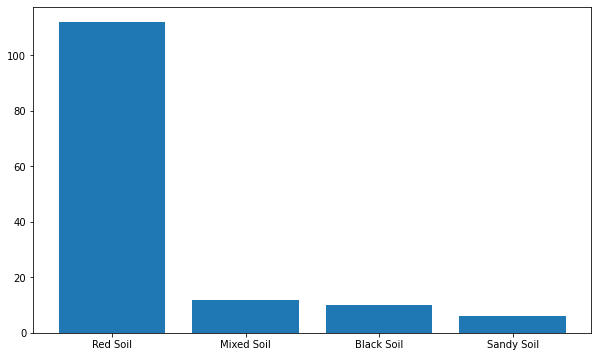

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['G.Nut', 'Horsegram', 'jowar', 'cotton', 'GROUND NUT', 'SUNFLOWER',
       'PADDY', 'TAMATO'], dtype=object)

In [14]:
df['Crop'].value_counts()

G.Nut         102
Horsegram      16
GROUND NUT     14
TAMATO          3
PADDY           2
SUNFLOWER       1
jowar           1
cotton          1
Name: Crop, dtype: int64

GroundNut    116
HorseGram     16
Tomato         3
Paddy          2
Name: Crop, dtype: int64


<BarContainer object of 4 artists>

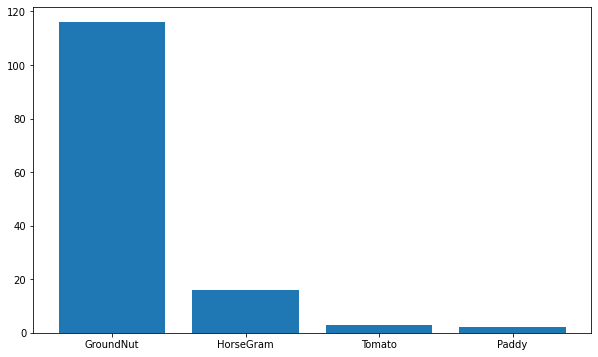

In [15]:
df['Crop'] = df['Crop'].replace(['G.Nut', 'GROUND NUT'], 'GroundNut')
df['Crop'] = df['Crop'].replace(['Horsegram'], 'HorseGram')
df['Crop'] = df['Crop'].replace(['TAMATO'], 'Tomato')
df['Crop'] = df['Crop'].replace(['PADDY'], 'Paddy')
df = df[(df['Crop'] != 'jowar') & (df['Crop'] != 'cotton') & (df['Crop'] != 'SUNFLOWER')]
print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
df = df[(df["Crop"] != 'Tomato') & (df["Crop"] != 'Paddy')]

In [17]:
# Getting rid of features that have a high correlation among one another

In [18]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,EVI
pH,1.000000,0.324521,0.246057,0.096174,0.270055,0.738869,0.333925,0.181708,0.128388,0.445603,-0.384213,0.163669,-0.604875,0.046349
EC,0.324521,1.000000,0.353826,0.536092,0.327708,0.382661,0.686467,0.917043,0.265468,0.445855,0.133792,0.346147,-0.144486,-0.026045
OC,0.246057,0.353826,1.000000,0.294536,0.533999,0.275270,0.583832,0.309083,0.380516,0.627248,0.203830,0.454423,-0.048781,0.074287
P,0.096174,0.536092,0.294536,1.000000,0.468772,0.110360,0.480357,0.704298,0.265371,0.299007,0.309679,0.349615,-0.016899,0.089168
K,0.270055,0.327708,0.533999,0.468772,1.000000,0.210341,0.500043,0.342663,0.225943,0.534825,0.183104,0.420192,-0.122099,0.156806
Ca,0.738869,0.382661,0.275270,0.110360,0.210341,1.000000,0.405896,0.254760,0.009658,0.352852,-0.186718,0.375051,-0.453159,-0.047450
Mg,0.333925,0.686467,0.583832,0.480357,0.500043,0.405896,1.000000,0.700722,0.209486,0.625129,0.259137,0.563011,-0.199968,-0.008336
S,0.181708,0.917043,0.309083,0.704298,0.342663,0.254760,0.700722,1.000000,0.177975,0.405801,0.276201,0.361188,-0.057399,-0.014954
Zn,0.128388,0.265468,0.380516,0.265371,0.225943,0.009658,0.209486,0.177975,1.000000,0.379540,0.045797,0.051484,0.034093,0.172610
B,0.445603,0.445855,0.627248,0.299007,0.534825,0.352852,0.625129,0.405801,0.379540,1.000000,0.058007,0.405252,-0.284042,0.163940


In [19]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)

Columns to be dropped :  ['P', 'K', 'Ca', 'Mg', 'S', 'B', 'Cu']


In [20]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'OC', 'Zn', 'Fe', 'Mn', 'EVI', 'Crop']


In [21]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [22]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
X = X.values
y = y.values
print(type(X[0]))

     pH    EC    OC   Zn    Fe     Mn       EVI  Black Soil  Mixed Soil  \
0  6.19  0.07  0.18  0.3  8.89  15.24  0.203906           0           1   

   Red Soil  Sandy Soil  
0         0           0  
<class 'numpy.ndarray'>


In [23]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
print(X[0])
X[:,0:7] = sc1.fit_transform(X[:,0:7])
print(X[0])

[ 6.19        0.07        0.18        0.3         8.89       15.24
  0.20390631  0.          1.          0.          0.        ]
[-1.4324609  -0.52831773 -0.58362014 -0.27682486  0.6931062   1.3388061
 -0.69632239  0.          1.          0.          0.        ]


In [24]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [48]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [49]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [50]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8787878787878788


In [51]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 86.89 %
Standard Deviation: 4.52 %


# Decision Tree Classifier

In [52]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [53]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [54]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8181818181818182


In [55]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 87.89 %
Standard Deviation: 7.46 %


# Random Forest Classifier

In [56]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [57]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [58]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8787878787878788


In [59]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 87.89 %
Standard Deviation: 3.96 %


In [60]:
# pickle.dump(clf3, open('Anantapur_model.pkl', 'wb'))
# pickle.dump(sc1, open('Anantapur_scaler.pkl', 'wb'))
# HERE

# XGBoost

In [61]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [62]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [63]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  0.98989898989899
Testing Accuracy:  0.8787878787878788


In [64]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [65]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 86.89 %
Standard Deviation: 7.77 %


# Multi-layer Perceptron Classifier

In [66]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [67]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [68]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.8888888888888888
Testing Accuracy:  0.8787878787878788


In [69]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 87.89 %
Standard Deviation: 3.96 %


# Catboost

In [71]:
# Catboost

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 0.3984355	total: 675us	remaining: 66.9ms
1:	learn: 0.3641064	total: 2.46ms	remaining: 121ms
2:	learn: 0.3388555	total: 3.01ms	remaining: 97.3ms
3:	learn: 0.3205414	total: 3.46ms	remaining: 83.1ms
4:	learn: 0.2903867	total: 3.88ms	remaining: 73.7ms
5:	learn: 0.2717405	total: 4.35ms	remaining: 68.2ms
6:	learn: 0.2607104	total: 4.86ms	remaining: 64.6ms
7:	learn: 0.2427568	total: 5.24ms	remaining: 60.3ms
8:	learn: 0.2366227	total: 5.77ms	remaining: 58.4ms
9:	learn: 0.2197057	total: 6.13ms	remaining: 55.2ms
10:	learn: 0.2093116	total: 6.76ms	remaining: 54.7ms
11:	learn: 0.1988149	total: 7.3ms	remaining: 53.5ms
12:	learn: 0.1818382	total: 7.92ms	remaining: 53ms
13:	learn: 0.1508325	total: 8.68ms	remaining: 53.3ms
14:	learn: 0.1490104	total: 9.12ms	remaining: 51.7ms
15:	learn: 0.1421274	total: 9.64ms	remaining: 50.6ms
16:	learn: 0.1291568	total: 10.2ms	remaining: 49.7ms
17:	learn: 0.1271782	total: 12.3ms	remaining: 56.2ms
18:	learn: 0.1213748	total: 12.8ms	remaining: 54.6ms
19:	lear

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.438809584
bestIteration = 65

Training on fold [1/5]

bestTest = 0.4270893152
bestIteration = 83

Training on fold [2/5]

bestTest = 0.3639677695
bestIteration = 99

Training on fold [3/5]

bestTest = 0.3378730413
bestIteration = 99

Training on fold [4/5]

bestTest = 0.3451179824
bestIteration = 98



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6815191	test: 0.6822494	best: 0.6822494 (0)	total: 938us	remaining: 938ms
1:	learn: 0.6661404	test: 0.6706217	best: 0.6706217 (1)	total: 1.9ms	remaining: 947ms
2:	learn: 0.6546808	test: 0.6621607	best: 0.6621607 (2)	total: 2.66ms	remaining: 885ms
3:	learn: 0.6431631	test: 0.6536485	best: 0.6536485 (3)	total: 3.56ms	remaining: 886ms
4:	learn: 0.6312859	test: 0.6463540	best: 0.6463540 (4)	total: 4.35ms	remaining: 866ms
5:	learn: 0.6178175	test: 0.6365523	best: 0.6365523 (5)	total: 5.02ms	remaining: 832ms
6:	learn: 0.6081897	test: 0.6288523	best: 0.6288523 (6)	total: 5.85ms	remaining: 830ms
7:	learn: 0.5985250	test: 0.6242636	best: 0.6242636 (7)	total: 6.72ms	remaining: 833ms
8:	learn: 0.5887718	test: 0.6183314	best: 0.6183314 (8)	total: 7.49ms	remaining: 824ms
9:	learn: 0.5786295	test: 0.6113958	best: 0.6113958 (9)	total: 8.22ms	remaining: 814ms
10:	learn: 0.5693032	test: 0.6049102	best: 0.6049102 (10)	total: 8.97ms	remaining: 806ms
11:	learn: 0.5608184	test: 0.5990153	best: 

202:	learn: 0.1818685	test: 0.5186405	best: 0.4890919 (65)	total: 166ms	remaining: 651ms
203:	learn: 0.1813146	test: 0.5172242	best: 0.4890919 (65)	total: 167ms	remaining: 650ms
204:	learn: 0.1808031	test: 0.5163540	best: 0.4890919 (65)	total: 167ms	remaining: 649ms
205:	learn: 0.1800372	test: 0.5150179	best: 0.4890919 (65)	total: 168ms	remaining: 649ms
206:	learn: 0.1795496	test: 0.5156146	best: 0.4890919 (65)	total: 169ms	remaining: 649ms
207:	learn: 0.1787881	test: 0.5157480	best: 0.4890919 (65)	total: 170ms	remaining: 648ms
208:	learn: 0.1783011	test: 0.5150663	best: 0.4890919 (65)	total: 171ms	remaining: 648ms
209:	learn: 0.1775272	test: 0.5160363	best: 0.4890919 (65)	total: 172ms	remaining: 647ms
210:	learn: 0.1765940	test: 0.5168571	best: 0.4890919 (65)	total: 173ms	remaining: 646ms
211:	learn: 0.1757975	test: 0.5172603	best: 0.4890919 (65)	total: 173ms	remaining: 645ms
212:	learn: 0.1751403	test: 0.5170449	best: 0.4890919 (65)	total: 174ms	remaining: 643ms
213:	learn: 0.1744075

421:	learn: 0.0767655	test: 0.5654835	best: 0.4890919 (65)	total: 330ms	remaining: 452ms
422:	learn: 0.0765933	test: 0.5662754	best: 0.4890919 (65)	total: 331ms	remaining: 451ms
423:	learn: 0.0763597	test: 0.5672808	best: 0.4890919 (65)	total: 332ms	remaining: 451ms
424:	learn: 0.0761016	test: 0.5683707	best: 0.4890919 (65)	total: 333ms	remaining: 450ms
425:	learn: 0.0759374	test: 0.5685287	best: 0.4890919 (65)	total: 333ms	remaining: 449ms
426:	learn: 0.0757207	test: 0.5688308	best: 0.4890919 (65)	total: 334ms	remaining: 449ms
427:	learn: 0.0755765	test: 0.5694470	best: 0.4890919 (65)	total: 335ms	remaining: 448ms
428:	learn: 0.0753969	test: 0.5699438	best: 0.4890919 (65)	total: 336ms	remaining: 447ms
429:	learn: 0.0751754	test: 0.5705958	best: 0.4890919 (65)	total: 337ms	remaining: 446ms
430:	learn: 0.0749642	test: 0.5714007	best: 0.4890919 (65)	total: 337ms	remaining: 446ms
431:	learn: 0.0746965	test: 0.5717543	best: 0.4890919 (65)	total: 338ms	remaining: 445ms
432:	learn: 0.0744660

615:	learn: 0.0456281	test: 0.6174349	best: 0.4890919 (65)	total: 489ms	remaining: 305ms
616:	learn: 0.0455380	test: 0.6169484	best: 0.4890919 (65)	total: 490ms	remaining: 304ms
617:	learn: 0.0454317	test: 0.6171971	best: 0.4890919 (65)	total: 491ms	remaining: 303ms
618:	learn: 0.0452854	test: 0.6171922	best: 0.4890919 (65)	total: 492ms	remaining: 303ms
619:	learn: 0.0452209	test: 0.6173793	best: 0.4890919 (65)	total: 493ms	remaining: 302ms
620:	learn: 0.0451754	test: 0.6175358	best: 0.4890919 (65)	total: 494ms	remaining: 301ms
621:	learn: 0.0450699	test: 0.6176410	best: 0.4890919 (65)	total: 494ms	remaining: 300ms
622:	learn: 0.0450125	test: 0.6178611	best: 0.4890919 (65)	total: 495ms	remaining: 300ms
623:	learn: 0.0448625	test: 0.6180006	best: 0.4890919 (65)	total: 496ms	remaining: 299ms
624:	learn: 0.0448310	test: 0.6182801	best: 0.4890919 (65)	total: 497ms	remaining: 298ms
625:	learn: 0.0448111	test: 0.6185914	best: 0.4890919 (65)	total: 497ms	remaining: 297ms
626:	learn: 0.0447456

818:	learn: 0.0310592	test: 0.6522070	best: 0.4890919 (65)	total: 657ms	remaining: 145ms
819:	learn: 0.0310021	test: 0.6528204	best: 0.4890919 (65)	total: 658ms	remaining: 144ms
820:	learn: 0.0308865	test: 0.6529937	best: 0.4890919 (65)	total: 658ms	remaining: 144ms
821:	learn: 0.0308169	test: 0.6532479	best: 0.4890919 (65)	total: 659ms	remaining: 143ms
822:	learn: 0.0307701	test: 0.6538015	best: 0.4890919 (65)	total: 660ms	remaining: 142ms
823:	learn: 0.0307464	test: 0.6537163	best: 0.4890919 (65)	total: 661ms	remaining: 141ms
824:	learn: 0.0307117	test: 0.6538849	best: 0.4890919 (65)	total: 662ms	remaining: 140ms
825:	learn: 0.0306562	test: 0.6536588	best: 0.4890919 (65)	total: 663ms	remaining: 140ms
826:	learn: 0.0306089	test: 0.6540529	best: 0.4890919 (65)	total: 663ms	remaining: 139ms
827:	learn: 0.0305507	test: 0.6548360	best: 0.4890919 (65)	total: 664ms	remaining: 138ms
828:	learn: 0.0305141	test: 0.6546852	best: 0.4890919 (65)	total: 665ms	remaining: 137ms
829:	learn: 0.0304677

10:	learn: 0.4110049	test: 0.5077813	best: 0.5077813 (10)	total: 12.3ms	remaining: 1.11s
11:	learn: 0.3999791	test: 0.5028280	best: 0.5028280 (11)	total: 13.2ms	remaining: 1.08s
12:	learn: 0.3909356	test: 0.4981077	best: 0.4981077 (12)	total: 14.1ms	remaining: 1.07s
13:	learn: 0.3816917	test: 0.4912730	best: 0.4912730 (13)	total: 15ms	remaining: 1.06s
14:	learn: 0.3696032	test: 0.4896618	best: 0.4896618 (14)	total: 15.9ms	remaining: 1.04s
15:	learn: 0.3600534	test: 0.4902435	best: 0.4896618 (14)	total: 16.7ms	remaining: 1.02s
16:	learn: 0.3527357	test: 0.4886325	best: 0.4886325 (16)	total: 17.4ms	remaining: 1.01s
17:	learn: 0.3443522	test: 0.4888756	best: 0.4886325 (16)	total: 18.2ms	remaining: 994ms
18:	learn: 0.3385985	test: 0.4862555	best: 0.4862555 (18)	total: 19ms	remaining: 979ms
19:	learn: 0.3339269	test: 0.4860646	best: 0.4860646 (19)	total: 19.8ms	remaining: 968ms
20:	learn: 0.3267558	test: 0.4863769	best: 0.4860646 (19)	total: 20.6ms	remaining: 959ms
21:	learn: 0.3212496	test

196:	learn: 0.0445968	test: 0.5862617	best: 0.4805651 (29)	total: 169ms	remaining: 689ms
197:	learn: 0.0441791	test: 0.5857842	best: 0.4805651 (29)	total: 170ms	remaining: 690ms
198:	learn: 0.0439207	test: 0.5863573	best: 0.4805651 (29)	total: 171ms	remaining: 689ms
199:	learn: 0.0436164	test: 0.5868014	best: 0.4805651 (29)	total: 172ms	remaining: 689ms
200:	learn: 0.0431957	test: 0.5876904	best: 0.4805651 (29)	total: 173ms	remaining: 688ms
201:	learn: 0.0430163	test: 0.5881061	best: 0.4805651 (29)	total: 174ms	remaining: 687ms
202:	learn: 0.0426993	test: 0.5897771	best: 0.4805651 (29)	total: 174ms	remaining: 685ms
203:	learn: 0.0424468	test: 0.5911793	best: 0.4805651 (29)	total: 175ms	remaining: 683ms
204:	learn: 0.0423154	test: 0.5909017	best: 0.4805651 (29)	total: 176ms	remaining: 682ms
205:	learn: 0.0418837	test: 0.5902769	best: 0.4805651 (29)	total: 177ms	remaining: 680ms
206:	learn: 0.0416861	test: 0.5914389	best: 0.4805651 (29)	total: 177ms	remaining: 679ms
207:	learn: 0.0413225

385:	learn: 0.0174644	test: 0.6842527	best: 0.4805651 (29)	total: 328ms	remaining: 522ms
386:	learn: 0.0174213	test: 0.6849975	best: 0.4805651 (29)	total: 329ms	remaining: 522ms
387:	learn: 0.0173655	test: 0.6856889	best: 0.4805651 (29)	total: 331ms	remaining: 521ms
388:	learn: 0.0172846	test: 0.6861760	best: 0.4805651 (29)	total: 331ms	remaining: 521ms
389:	learn: 0.0172512	test: 0.6861002	best: 0.4805651 (29)	total: 332ms	remaining: 520ms
390:	learn: 0.0171800	test: 0.6860809	best: 0.4805651 (29)	total: 333ms	remaining: 519ms
391:	learn: 0.0171326	test: 0.6868380	best: 0.4805651 (29)	total: 334ms	remaining: 518ms
392:	learn: 0.0170286	test: 0.6859024	best: 0.4805651 (29)	total: 335ms	remaining: 517ms
393:	learn: 0.0169824	test: 0.6866531	best: 0.4805651 (29)	total: 335ms	remaining: 516ms
394:	learn: 0.0169451	test: 0.6872182	best: 0.4805651 (29)	total: 336ms	remaining: 515ms
395:	learn: 0.0168850	test: 0.6872518	best: 0.4805651 (29)	total: 337ms	remaining: 514ms
396:	learn: 0.0168318

592:	learn: 0.0101499	test: 0.7412953	best: 0.4805651 (29)	total: 494ms	remaining: 339ms
593:	learn: 0.0101425	test: 0.7411354	best: 0.4805651 (29)	total: 495ms	remaining: 338ms
594:	learn: 0.0101282	test: 0.7412771	best: 0.4805651 (29)	total: 495ms	remaining: 337ms
595:	learn: 0.0101207	test: 0.7411239	best: 0.4805651 (29)	total: 496ms	remaining: 336ms
596:	learn: 0.0100910	test: 0.7416258	best: 0.4805651 (29)	total: 497ms	remaining: 336ms
597:	learn: 0.0100703	test: 0.7419362	best: 0.4805651 (29)	total: 498ms	remaining: 335ms
598:	learn: 0.0100589	test: 0.7420438	best: 0.4805651 (29)	total: 499ms	remaining: 334ms
599:	learn: 0.0100437	test: 0.7429058	best: 0.4805651 (29)	total: 500ms	remaining: 333ms
600:	learn: 0.0100343	test: 0.7429593	best: 0.4805651 (29)	total: 501ms	remaining: 332ms
601:	learn: 0.0100124	test: 0.7427868	best: 0.4805651 (29)	total: 502ms	remaining: 332ms
602:	learn: 0.0099838	test: 0.7427244	best: 0.4805651 (29)	total: 503ms	remaining: 331ms
603:	learn: 0.0099651

795:	learn: 0.0071583	test: 0.7783004	best: 0.4805651 (29)	total: 658ms	remaining: 169ms
796:	learn: 0.0071449	test: 0.7784368	best: 0.4805651 (29)	total: 659ms	remaining: 168ms
797:	learn: 0.0071368	test: 0.7785054	best: 0.4805651 (29)	total: 659ms	remaining: 167ms
798:	learn: 0.0071326	test: 0.7787356	best: 0.4805651 (29)	total: 660ms	remaining: 166ms
799:	learn: 0.0071289	test: 0.7790914	best: 0.4805651 (29)	total: 661ms	remaining: 165ms
800:	learn: 0.0071223	test: 0.7792301	best: 0.4805651 (29)	total: 662ms	remaining: 164ms
801:	learn: 0.0071181	test: 0.7794481	best: 0.4805651 (29)	total: 663ms	remaining: 164ms
802:	learn: 0.0071047	test: 0.7795201	best: 0.4805651 (29)	total: 663ms	remaining: 163ms
803:	learn: 0.0070973	test: 0.7797594	best: 0.4805651 (29)	total: 664ms	remaining: 162ms
804:	learn: 0.0070943	test: 0.7801125	best: 0.4805651 (29)	total: 665ms	remaining: 161ms
805:	learn: 0.0070882	test: 0.7803182	best: 0.4805651 (29)	total: 666ms	remaining: 160ms
806:	learn: 0.0070765

960:	learn: 0.0057557	test: 0.8055846	best: 0.4805651 (29)	total: 819ms	remaining: 33.2ms
961:	learn: 0.0057539	test: 0.8053753	best: 0.4805651 (29)	total: 821ms	remaining: 32.4ms
962:	learn: 0.0057483	test: 0.8050978	best: 0.4805651 (29)	total: 822ms	remaining: 31.6ms
963:	learn: 0.0057466	test: 0.8051306	best: 0.4805651 (29)	total: 822ms	remaining: 30.7ms
964:	learn: 0.0057409	test: 0.8052950	best: 0.4805651 (29)	total: 824ms	remaining: 29.9ms
965:	learn: 0.0057335	test: 0.8056577	best: 0.4805651 (29)	total: 825ms	remaining: 29ms
966:	learn: 0.0057256	test: 0.8061792	best: 0.4805651 (29)	total: 825ms	remaining: 28.2ms
967:	learn: 0.0057223	test: 0.8064088	best: 0.4805651 (29)	total: 826ms	remaining: 27.3ms
968:	learn: 0.0057168	test: 0.8065175	best: 0.4805651 (29)	total: 827ms	remaining: 26.5ms
969:	learn: 0.0057103	test: 0.8065806	best: 0.4805651 (29)	total: 828ms	remaining: 25.6ms
970:	learn: 0.0057038	test: 0.8070451	best: 0.4805651 (29)	total: 828ms	remaining: 24.7ms
971:	learn: 

81:	learn: 0.3026378	test: 0.4842002	best: 0.4838552 (80)	total: 119ms	remaining: 1.33s
82:	learn: 0.3008293	test: 0.4845007	best: 0.4838552 (80)	total: 121ms	remaining: 1.33s
83:	learn: 0.2995521	test: 0.4844399	best: 0.4838552 (80)	total: 122ms	remaining: 1.33s
84:	learn: 0.2977103	test: 0.4842656	best: 0.4838552 (80)	total: 124ms	remaining: 1.33s
85:	learn: 0.2955596	test: 0.4831038	best: 0.4831038 (85)	total: 125ms	remaining: 1.33s
86:	learn: 0.2937492	test: 0.4828183	best: 0.4828183 (86)	total: 126ms	remaining: 1.33s
87:	learn: 0.2917678	test: 0.4827938	best: 0.4827938 (87)	total: 128ms	remaining: 1.32s
88:	learn: 0.2896322	test: 0.4825529	best: 0.4825529 (88)	total: 130ms	remaining: 1.32s
89:	learn: 0.2877233	test: 0.4818951	best: 0.4818951 (89)	total: 131ms	remaining: 1.32s
90:	learn: 0.2861516	test: 0.4823895	best: 0.4818951 (89)	total: 132ms	remaining: 1.32s
91:	learn: 0.2844290	test: 0.4821178	best: 0.4818951 (89)	total: 134ms	remaining: 1.32s
92:	learn: 0.2825387	test: 0.482

202:	learn: 0.1559057	test: 0.4815320	best: 0.4760328 (156)	total: 291ms	remaining: 1.14s
203:	learn: 0.1553841	test: 0.4821445	best: 0.4760328 (156)	total: 293ms	remaining: 1.14s
204:	learn: 0.1548546	test: 0.4823212	best: 0.4760328 (156)	total: 295ms	remaining: 1.14s
205:	learn: 0.1542750	test: 0.4826196	best: 0.4760328 (156)	total: 297ms	remaining: 1.14s
206:	learn: 0.1530817	test: 0.4824999	best: 0.4760328 (156)	total: 298ms	remaining: 1.14s
207:	learn: 0.1522905	test: 0.4820045	best: 0.4760328 (156)	total: 300ms	remaining: 1.14s
208:	learn: 0.1515493	test: 0.4816209	best: 0.4760328 (156)	total: 302ms	remaining: 1.14s
209:	learn: 0.1512432	test: 0.4819123	best: 0.4760328 (156)	total: 304ms	remaining: 1.14s
210:	learn: 0.1501618	test: 0.4823743	best: 0.4760328 (156)	total: 305ms	remaining: 1.14s
211:	learn: 0.1490273	test: 0.4823457	best: 0.4760328 (156)	total: 307ms	remaining: 1.14s
212:	learn: 0.1483675	test: 0.4828903	best: 0.4760328 (156)	total: 309ms	remaining: 1.14s
213:	learn

318:	learn: 0.0853607	test: 0.5155536	best: 0.4760328 (156)	total: 457ms	remaining: 975ms
319:	learn: 0.0851037	test: 0.5147020	best: 0.4760328 (156)	total: 458ms	remaining: 974ms
320:	learn: 0.0847613	test: 0.5149139	best: 0.4760328 (156)	total: 460ms	remaining: 973ms
321:	learn: 0.0843575	test: 0.5155941	best: 0.4760328 (156)	total: 461ms	remaining: 971ms
322:	learn: 0.0840790	test: 0.5156852	best: 0.4760328 (156)	total: 462ms	remaining: 969ms
323:	learn: 0.0836918	test: 0.5159795	best: 0.4760328 (156)	total: 464ms	remaining: 967ms
324:	learn: 0.0832451	test: 0.5153997	best: 0.4760328 (156)	total: 465ms	remaining: 966ms
325:	learn: 0.0825484	test: 0.5153457	best: 0.4760328 (156)	total: 466ms	remaining: 964ms
326:	learn: 0.0821997	test: 0.5157365	best: 0.4760328 (156)	total: 467ms	remaining: 962ms
327:	learn: 0.0818657	test: 0.5166882	best: 0.4760328 (156)	total: 469ms	remaining: 960ms
328:	learn: 0.0814218	test: 0.5163982	best: 0.4760328 (156)	total: 470ms	remaining: 958ms
329:	learn

439:	learn: 0.0548607	test: 0.5527853	best: 0.4760328 (156)	total: 626ms	remaining: 797ms
440:	learn: 0.0546944	test: 0.5527948	best: 0.4760328 (156)	total: 628ms	remaining: 796ms
441:	learn: 0.0545827	test: 0.5532767	best: 0.4760328 (156)	total: 630ms	remaining: 795ms
442:	learn: 0.0544144	test: 0.5535206	best: 0.4760328 (156)	total: 631ms	remaining: 794ms
443:	learn: 0.0541802	test: 0.5536989	best: 0.4760328 (156)	total: 633ms	remaining: 792ms
444:	learn: 0.0538998	test: 0.5541396	best: 0.4760328 (156)	total: 634ms	remaining: 790ms
445:	learn: 0.0538052	test: 0.5547768	best: 0.4760328 (156)	total: 635ms	remaining: 789ms
446:	learn: 0.0535536	test: 0.5551818	best: 0.4760328 (156)	total: 636ms	remaining: 787ms
447:	learn: 0.0534240	test: 0.5556005	best: 0.4760328 (156)	total: 638ms	remaining: 786ms
448:	learn: 0.0533241	test: 0.5558343	best: 0.4760328 (156)	total: 639ms	remaining: 785ms
449:	learn: 0.0531669	test: 0.5563967	best: 0.4760328 (156)	total: 641ms	remaining: 783ms
450:	learn

554:	learn: 0.0393761	test: 0.5821386	best: 0.4760328 (156)	total: 800ms	remaining: 641ms
555:	learn: 0.0392729	test: 0.5823616	best: 0.4760328 (156)	total: 801ms	remaining: 640ms
556:	learn: 0.0392038	test: 0.5827818	best: 0.4760328 (156)	total: 803ms	remaining: 639ms
557:	learn: 0.0390913	test: 0.5831590	best: 0.4760328 (156)	total: 805ms	remaining: 637ms
558:	learn: 0.0389975	test: 0.5836256	best: 0.4760328 (156)	total: 806ms	remaining: 636ms
559:	learn: 0.0389012	test: 0.5845483	best: 0.4760328 (156)	total: 807ms	remaining: 634ms
560:	learn: 0.0387662	test: 0.5844838	best: 0.4760328 (156)	total: 809ms	remaining: 633ms
561:	learn: 0.0386892	test: 0.5848321	best: 0.4760328 (156)	total: 810ms	remaining: 631ms
562:	learn: 0.0385673	test: 0.5849480	best: 0.4760328 (156)	total: 812ms	remaining: 630ms
563:	learn: 0.0385006	test: 0.5848319	best: 0.4760328 (156)	total: 813ms	remaining: 629ms
564:	learn: 0.0383579	test: 0.5853015	best: 0.4760328 (156)	total: 815ms	remaining: 627ms
565:	learn

667:	learn: 0.0301837	test: 0.6076152	best: 0.4760328 (156)	total: 966ms	remaining: 480ms
668:	learn: 0.0301465	test: 0.6082883	best: 0.4760328 (156)	total: 967ms	remaining: 478ms
669:	learn: 0.0301037	test: 0.6081320	best: 0.4760328 (156)	total: 968ms	remaining: 477ms
670:	learn: 0.0300203	test: 0.6082733	best: 0.4760328 (156)	total: 970ms	remaining: 476ms
671:	learn: 0.0299649	test: 0.6084284	best: 0.4760328 (156)	total: 971ms	remaining: 474ms
672:	learn: 0.0299337	test: 0.6085318	best: 0.4760328 (156)	total: 973ms	remaining: 473ms
673:	learn: 0.0298723	test: 0.6087926	best: 0.4760328 (156)	total: 974ms	remaining: 471ms
674:	learn: 0.0298220	test: 0.6092419	best: 0.4760328 (156)	total: 975ms	remaining: 470ms
675:	learn: 0.0297483	test: 0.6097752	best: 0.4760328 (156)	total: 977ms	remaining: 468ms
676:	learn: 0.0297019	test: 0.6102102	best: 0.4760328 (156)	total: 978ms	remaining: 467ms
677:	learn: 0.0296302	test: 0.6104570	best: 0.4760328 (156)	total: 980ms	remaining: 465ms
678:	learn

778:	learn: 0.0246429	test: 0.6276622	best: 0.4760328 (156)	total: 1.13s	remaining: 321ms
779:	learn: 0.0245976	test: 0.6278832	best: 0.4760328 (156)	total: 1.13s	remaining: 319ms
780:	learn: 0.0245703	test: 0.6280382	best: 0.4760328 (156)	total: 1.13s	remaining: 318ms
781:	learn: 0.0245311	test: 0.6275621	best: 0.4760328 (156)	total: 1.14s	remaining: 316ms
782:	learn: 0.0245024	test: 0.6278977	best: 0.4760328 (156)	total: 1.14s	remaining: 315ms
783:	learn: 0.0244491	test: 0.6281245	best: 0.4760328 (156)	total: 1.14s	remaining: 314ms
784:	learn: 0.0244300	test: 0.6283059	best: 0.4760328 (156)	total: 1.14s	remaining: 312ms
785:	learn: 0.0243693	test: 0.6284330	best: 0.4760328 (156)	total: 1.14s	remaining: 311ms
786:	learn: 0.0243166	test: 0.6286948	best: 0.4760328 (156)	total: 1.14s	remaining: 309ms
787:	learn: 0.0242714	test: 0.6285418	best: 0.4760328 (156)	total: 1.14s	remaining: 308ms
788:	learn: 0.0241963	test: 0.6285012	best: 0.4760328 (156)	total: 1.15s	remaining: 306ms
789:	learn

897:	learn: 0.0205495	test: 0.6457354	best: 0.4760328 (156)	total: 1.31s	remaining: 148ms
898:	learn: 0.0205347	test: 0.6457329	best: 0.4760328 (156)	total: 1.31s	remaining: 147ms
899:	learn: 0.0205093	test: 0.6458724	best: 0.4760328 (156)	total: 1.31s	remaining: 146ms
900:	learn: 0.0204878	test: 0.6460523	best: 0.4760328 (156)	total: 1.31s	remaining: 144ms
901:	learn: 0.0204633	test: 0.6461910	best: 0.4760328 (156)	total: 1.31s	remaining: 143ms
902:	learn: 0.0204435	test: 0.6463407	best: 0.4760328 (156)	total: 1.31s	remaining: 141ms
903:	learn: 0.0204183	test: 0.6463066	best: 0.4760328 (156)	total: 1.32s	remaining: 140ms
904:	learn: 0.0203803	test: 0.6465659	best: 0.4760328 (156)	total: 1.32s	remaining: 138ms
905:	learn: 0.0203486	test: 0.6467383	best: 0.4760328 (156)	total: 1.32s	remaining: 137ms
906:	learn: 0.0203341	test: 0.6467767	best: 0.4760328 (156)	total: 1.32s	remaining: 136ms
907:	learn: 0.0203181	test: 0.6469943	best: 0.4760328 (156)	total: 1.32s	remaining: 134ms
908:	learn

1:	learn: 0.6329140	test: 0.6494655	best: 0.6494655 (1)	total: 5.22ms	remaining: 2.61s
2:	learn: 0.5982120	test: 0.6246867	best: 0.6246867 (2)	total: 6.85ms	remaining: 2.28s
3:	learn: 0.5655106	test: 0.6071181	best: 0.6071181 (3)	total: 8.32ms	remaining: 2.07s
4:	learn: 0.5360267	test: 0.5968361	best: 0.5968361 (4)	total: 9.71ms	remaining: 1.93s
5:	learn: 0.5189919	test: 0.5849861	best: 0.5849861 (5)	total: 11ms	remaining: 1.83s
6:	learn: 0.4998487	test: 0.5730617	best: 0.5730617 (6)	total: 12.2ms	remaining: 1.73s
7:	learn: 0.4860233	test: 0.5639360	best: 0.5639360 (7)	total: 13.6ms	remaining: 1.69s
8:	learn: 0.4708518	test: 0.5565184	best: 0.5565184 (8)	total: 15ms	remaining: 1.65s
9:	learn: 0.4585206	test: 0.5503256	best: 0.5503256 (9)	total: 16.4ms	remaining: 1.63s
10:	learn: 0.4438302	test: 0.5424238	best: 0.5424238 (10)	total: 18ms	remaining: 1.62s
11:	learn: 0.4299656	test: 0.5310375	best: 0.5310375 (11)	total: 19.3ms	remaining: 1.59s
12:	learn: 0.4154521	test: 0.5225497	best: 0.

115:	learn: 0.0705164	test: 0.5224223	best: 0.4548425 (45)	total: 175ms	remaining: 1.33s
116:	learn: 0.0696363	test: 0.5243798	best: 0.4548425 (45)	total: 176ms	remaining: 1.33s
117:	learn: 0.0690784	test: 0.5247279	best: 0.4548425 (45)	total: 178ms	remaining: 1.33s
118:	learn: 0.0681360	test: 0.5224069	best: 0.4548425 (45)	total: 180ms	remaining: 1.33s
119:	learn: 0.0672971	test: 0.5215169	best: 0.4548425 (45)	total: 181ms	remaining: 1.33s
120:	learn: 0.0667502	test: 0.5227156	best: 0.4548425 (45)	total: 182ms	remaining: 1.32s
121:	learn: 0.0661014	test: 0.5236669	best: 0.4548425 (45)	total: 184ms	remaining: 1.32s
122:	learn: 0.0652157	test: 0.5233119	best: 0.4548425 (45)	total: 186ms	remaining: 1.32s
123:	learn: 0.0642044	test: 0.5246667	best: 0.4548425 (45)	total: 187ms	remaining: 1.32s
124:	learn: 0.0627273	test: 0.5263647	best: 0.4548425 (45)	total: 188ms	remaining: 1.32s
125:	learn: 0.0621055	test: 0.5275172	best: 0.4548425 (45)	total: 190ms	remaining: 1.31s
126:	learn: 0.0617401

220:	learn: 0.0276299	test: 0.5830101	best: 0.4548425 (45)	total: 339ms	remaining: 1.2s
221:	learn: 0.0274131	test: 0.5829511	best: 0.4548425 (45)	total: 341ms	remaining: 1.19s
222:	learn: 0.0272845	test: 0.5842464	best: 0.4548425 (45)	total: 342ms	remaining: 1.19s
223:	learn: 0.0271344	test: 0.5848278	best: 0.4548425 (45)	total: 344ms	remaining: 1.19s
224:	learn: 0.0269384	test: 0.5859807	best: 0.4548425 (45)	total: 346ms	remaining: 1.19s
225:	learn: 0.0267747	test: 0.5870104	best: 0.4548425 (45)	total: 347ms	remaining: 1.19s
226:	learn: 0.0266329	test: 0.5886171	best: 0.4548425 (45)	total: 349ms	remaining: 1.19s
227:	learn: 0.0264973	test: 0.5908112	best: 0.4548425 (45)	total: 350ms	remaining: 1.18s
228:	learn: 0.0264072	test: 0.5915850	best: 0.4548425 (45)	total: 351ms	remaining: 1.18s
229:	learn: 0.0262685	test: 0.5931401	best: 0.4548425 (45)	total: 353ms	remaining: 1.18s
230:	learn: 0.0261334	test: 0.5920657	best: 0.4548425 (45)	total: 354ms	remaining: 1.18s
231:	learn: 0.0259626	

335:	learn: 0.0158338	test: 0.6526052	best: 0.4548425 (45)	total: 514ms	remaining: 1.01s
336:	learn: 0.0157654	test: 0.6534954	best: 0.4548425 (45)	total: 516ms	remaining: 1.01s
337:	learn: 0.0156857	test: 0.6542273	best: 0.4548425 (45)	total: 518ms	remaining: 1.01s
338:	learn: 0.0156099	test: 0.6549407	best: 0.4548425 (45)	total: 519ms	remaining: 1.01s
339:	learn: 0.0155480	test: 0.6551922	best: 0.4548425 (45)	total: 520ms	remaining: 1.01s
340:	learn: 0.0154848	test: 0.6557412	best: 0.4548425 (45)	total: 522ms	remaining: 1.01s
341:	learn: 0.0154297	test: 0.6561610	best: 0.4548425 (45)	total: 523ms	remaining: 1.01s
342:	learn: 0.0153687	test: 0.6560865	best: 0.4548425 (45)	total: 524ms	remaining: 1s
343:	learn: 0.0153273	test: 0.6568347	best: 0.4548425 (45)	total: 526ms	remaining: 1s
344:	learn: 0.0152772	test: 0.6577867	best: 0.4548425 (45)	total: 527ms	remaining: 1s
345:	learn: 0.0152145	test: 0.6574696	best: 0.4548425 (45)	total: 529ms	remaining: 999ms
346:	learn: 0.0151235	test: 0.

438:	learn: 0.0112701	test: 0.6870936	best: 0.4548425 (45)	total: 681ms	remaining: 870ms
439:	learn: 0.0112473	test: 0.6875297	best: 0.4548425 (45)	total: 683ms	remaining: 869ms
440:	learn: 0.0112258	test: 0.6874178	best: 0.4548425 (45)	total: 684ms	remaining: 868ms
441:	learn: 0.0111993	test: 0.6878984	best: 0.4548425 (45)	total: 686ms	remaining: 866ms
442:	learn: 0.0111807	test: 0.6877685	best: 0.4548425 (45)	total: 687ms	remaining: 864ms
443:	learn: 0.0111607	test: 0.6880272	best: 0.4548425 (45)	total: 688ms	remaining: 862ms
444:	learn: 0.0111438	test: 0.6886487	best: 0.4548425 (45)	total: 690ms	remaining: 860ms
445:	learn: 0.0111024	test: 0.6892589	best: 0.4548425 (45)	total: 691ms	remaining: 858ms
446:	learn: 0.0110801	test: 0.6895221	best: 0.4548425 (45)	total: 692ms	remaining: 857ms
447:	learn: 0.0110344	test: 0.6896898	best: 0.4548425 (45)	total: 694ms	remaining: 855ms
448:	learn: 0.0110095	test: 0.6898704	best: 0.4548425 (45)	total: 695ms	remaining: 853ms
449:	learn: 0.0109758

562:	learn: 0.0084014	test: 0.7185331	best: 0.4548425 (45)	total: 861ms	remaining: 668ms
563:	learn: 0.0083917	test: 0.7187663	best: 0.4548425 (45)	total: 862ms	remaining: 667ms
564:	learn: 0.0083676	test: 0.7195402	best: 0.4548425 (45)	total: 864ms	remaining: 665ms
565:	learn: 0.0083606	test: 0.7197415	best: 0.4548425 (45)	total: 866ms	remaining: 664ms
566:	learn: 0.0083384	test: 0.7202535	best: 0.4548425 (45)	total: 867ms	remaining: 662ms
567:	learn: 0.0083273	test: 0.7207726	best: 0.4548425 (45)	total: 868ms	remaining: 660ms
568:	learn: 0.0083082	test: 0.7206979	best: 0.4548425 (45)	total: 870ms	remaining: 659ms
569:	learn: 0.0082973	test: 0.7209508	best: 0.4548425 (45)	total: 871ms	remaining: 657ms
570:	learn: 0.0082669	test: 0.7211037	best: 0.4548425 (45)	total: 872ms	remaining: 655ms
571:	learn: 0.0082549	test: 0.7218991	best: 0.4548425 (45)	total: 873ms	remaining: 654ms
572:	learn: 0.0082425	test: 0.7219172	best: 0.4548425 (45)	total: 875ms	remaining: 652ms
573:	learn: 0.0082342

667:	learn: 0.0067881	test: 0.7440578	best: 0.4548425 (45)	total: 1.02s	remaining: 509ms
668:	learn: 0.0067716	test: 0.7445621	best: 0.4548425 (45)	total: 1.03s	remaining: 510ms
669:	learn: 0.0067579	test: 0.7447798	best: 0.4548425 (45)	total: 1.03s	remaining: 509ms
670:	learn: 0.0067475	test: 0.7450541	best: 0.4548425 (45)	total: 1.03s	remaining: 507ms
671:	learn: 0.0067356	test: 0.7452758	best: 0.4548425 (45)	total: 1.04s	remaining: 506ms
672:	learn: 0.0067247	test: 0.7456728	best: 0.4548425 (45)	total: 1.04s	remaining: 505ms
673:	learn: 0.0067158	test: 0.7461799	best: 0.4548425 (45)	total: 1.04s	remaining: 503ms
674:	learn: 0.0067027	test: 0.7464788	best: 0.4548425 (45)	total: 1.04s	remaining: 502ms
675:	learn: 0.0066905	test: 0.7466757	best: 0.4548425 (45)	total: 1.04s	remaining: 500ms
676:	learn: 0.0066837	test: 0.7467801	best: 0.4548425 (45)	total: 1.04s	remaining: 498ms
677:	learn: 0.0066703	test: 0.7466250	best: 0.4548425 (45)	total: 1.04s	remaining: 497ms
678:	learn: 0.0066596

770:	learn: 0.0057574	test: 0.7629628	best: 0.4548425 (45)	total: 1.19s	remaining: 352ms
771:	learn: 0.0057487	test: 0.7629450	best: 0.4548425 (45)	total: 1.19s	remaining: 351ms
772:	learn: 0.0057422	test: 0.7630434	best: 0.4548425 (45)	total: 1.19s	remaining: 350ms
773:	learn: 0.0057310	test: 0.7631671	best: 0.4548425 (45)	total: 1.19s	remaining: 348ms
774:	learn: 0.0057209	test: 0.7638085	best: 0.4548425 (45)	total: 1.19s	remaining: 346ms
775:	learn: 0.0057090	test: 0.7636285	best: 0.4548425 (45)	total: 1.2s	remaining: 345ms
776:	learn: 0.0057015	test: 0.7639834	best: 0.4548425 (45)	total: 1.2s	remaining: 343ms
777:	learn: 0.0056970	test: 0.7640152	best: 0.4548425 (45)	total: 1.2s	remaining: 342ms
778:	learn: 0.0056914	test: 0.7645299	best: 0.4548425 (45)	total: 1.2s	remaining: 340ms
779:	learn: 0.0056854	test: 0.7646574	best: 0.4548425 (45)	total: 1.2s	remaining: 338ms
780:	learn: 0.0056793	test: 0.7647463	best: 0.4548425 (45)	total: 1.2s	remaining: 337ms
781:	learn: 0.0056762	test:

887:	learn: 0.0049293	test: 0.7822586	best: 0.4548425 (45)	total: 1.36s	remaining: 171ms
888:	learn: 0.0049236	test: 0.7824176	best: 0.4548425 (45)	total: 1.36s	remaining: 170ms
889:	learn: 0.0049168	test: 0.7826061	best: 0.4548425 (45)	total: 1.36s	remaining: 168ms
890:	learn: 0.0049127	test: 0.7828181	best: 0.4548425 (45)	total: 1.36s	remaining: 167ms
891:	learn: 0.0049020	test: 0.7827956	best: 0.4548425 (45)	total: 1.36s	remaining: 165ms
892:	learn: 0.0048972	test: 0.7829940	best: 0.4548425 (45)	total: 1.37s	remaining: 164ms
893:	learn: 0.0048921	test: 0.7830024	best: 0.4548425 (45)	total: 1.37s	remaining: 162ms
894:	learn: 0.0048868	test: 0.7835182	best: 0.4548425 (45)	total: 1.37s	remaining: 161ms
895:	learn: 0.0048822	test: 0.7836402	best: 0.4548425 (45)	total: 1.37s	remaining: 159ms
896:	learn: 0.0048755	test: 0.7837260	best: 0.4548425 (45)	total: 1.37s	remaining: 158ms
897:	learn: 0.0048700	test: 0.7838602	best: 0.4548425 (45)	total: 1.37s	remaining: 156ms
898:	learn: 0.0048642

0:	learn: 0.6864600	test: 0.6895510	best: 0.6895510 (0)	total: 19ms	remaining: 18.9s
1:	learn: 0.6783487	test: 0.6839177	best: 0.6839177 (1)	total: 29.1ms	remaining: 14.5s
2:	learn: 0.6688062	test: 0.6788269	best: 0.6788269 (2)	total: 45.7ms	remaining: 15.2s
3:	learn: 0.6614064	test: 0.6749530	best: 0.6749530 (3)	total: 62.5ms	remaining: 15.6s
4:	learn: 0.6477725	test: 0.6645557	best: 0.6645557 (4)	total: 63.1ms	remaining: 12.6s
5:	learn: 0.6422092	test: 0.6623388	best: 0.6623388 (5)	total: 84.2ms	remaining: 13.9s
6:	learn: 0.6365239	test: 0.6595858	best: 0.6595858 (6)	total: 102ms	remaining: 14.4s
7:	learn: 0.6275704	test: 0.6534278	best: 0.6534278 (7)	total: 106ms	remaining: 13.2s
8:	learn: 0.6201826	test: 0.6494241	best: 0.6494241 (8)	total: 114ms	remaining: 12.5s
9:	learn: 0.6108638	test: 0.6451248	best: 0.6451248 (9)	total: 138ms	remaining: 13.6s
10:	learn: 0.6040351	test: 0.6397798	best: 0.6397798 (10)	total: 141ms	remaining: 12.7s
11:	learn: 0.5952744	test: 0.6357963	best: 0.635

97:	learn: 0.2948808	test: 0.5070921	best: 0.5068537 (96)	total: 1.39s	remaining: 12.8s
98:	learn: 0.2933641	test: 0.5068044	best: 0.5068044 (98)	total: 1.4s	remaining: 12.8s
99:	learn: 0.2914516	test: 0.5066631	best: 0.5066631 (99)	total: 1.41s	remaining: 12.7s
100:	learn: 0.2900197	test: 0.5061383	best: 0.5061383 (100)	total: 1.43s	remaining: 12.7s
101:	learn: 0.2876017	test: 0.5055906	best: 0.5055906 (101)	total: 1.43s	remaining: 12.6s
102:	learn: 0.2842341	test: 0.5027486	best: 0.5027486 (102)	total: 1.43s	remaining: 12.5s
103:	learn: 0.2824524	test: 0.5020232	best: 0.5020232 (103)	total: 1.45s	remaining: 12.5s
104:	learn: 0.2810288	test: 0.5018091	best: 0.5018091 (104)	total: 1.47s	remaining: 12.6s
105:	learn: 0.2795591	test: 0.5011946	best: 0.5011946 (105)	total: 1.5s	remaining: 12.6s
106:	learn: 0.2777242	test: 0.5008912	best: 0.5008912 (106)	total: 1.51s	remaining: 12.6s
107:	learn: 0.2749032	test: 0.4996494	best: 0.4996494 (107)	total: 1.51s	remaining: 12.5s
108:	learn: 0.2736

197:	learn: 0.1634693	test: 0.4783995	best: 0.4758880 (176)	total: 2.98s	remaining: 12.1s
198:	learn: 0.1626242	test: 0.4788523	best: 0.4758880 (176)	total: 3s	remaining: 12.1s
199:	learn: 0.1617428	test: 0.4791612	best: 0.4758880 (176)	total: 3.02s	remaining: 12.1s
200:	learn: 0.1604947	test: 0.4788551	best: 0.4758880 (176)	total: 3.02s	remaining: 12s
201:	learn: 0.1597052	test: 0.4794240	best: 0.4758880 (176)	total: 3.03s	remaining: 12s
202:	learn: 0.1591707	test: 0.4797790	best: 0.4758880 (176)	total: 3.05s	remaining: 12s
203:	learn: 0.1583501	test: 0.4802408	best: 0.4758880 (176)	total: 3.07s	remaining: 12s
204:	learn: 0.1574816	test: 0.4800151	best: 0.4758880 (176)	total: 3.08s	remaining: 12s
205:	learn: 0.1564560	test: 0.4794374	best: 0.4758880 (176)	total: 3.11s	remaining: 12s
206:	learn: 0.1555917	test: 0.4788749	best: 0.4758880 (176)	total: 3.12s	remaining: 12s
207:	learn: 0.1549861	test: 0.4786486	best: 0.4758880 (176)	total: 3.14s	remaining: 12s
208:	learn: 0.1543888	test: 0

294:	learn: 0.1020721	test: 0.4873801	best: 0.4758880 (176)	total: 4.63s	remaining: 11.1s
295:	learn: 0.1017474	test: 0.4875111	best: 0.4758880 (176)	total: 4.65s	remaining: 11.1s
296:	learn: 0.1012696	test: 0.4876726	best: 0.4758880 (176)	total: 4.66s	remaining: 11s
297:	learn: 0.1009276	test: 0.4880858	best: 0.4758880 (176)	total: 4.68s	remaining: 11s
298:	learn: 0.1004872	test: 0.4876315	best: 0.4758880 (176)	total: 4.7s	remaining: 11s
299:	learn: 0.0999672	test: 0.4871983	best: 0.4758880 (176)	total: 4.71s	remaining: 11s
300:	learn: 0.0993824	test: 0.4869617	best: 0.4758880 (176)	total: 4.72s	remaining: 11s
301:	learn: 0.0989560	test: 0.4871015	best: 0.4758880 (176)	total: 4.74s	remaining: 11s
302:	learn: 0.0983802	test: 0.4876691	best: 0.4758880 (176)	total: 4.76s	remaining: 10.9s
303:	learn: 0.0979469	test: 0.4873715	best: 0.4758880 (176)	total: 4.78s	remaining: 10.9s
304:	learn: 0.0973932	test: 0.4874165	best: 0.4758880 (176)	total: 4.79s	remaining: 10.9s
305:	learn: 0.0969527	t

396:	learn: 0.0686801	test: 0.5080530	best: 0.4758880 (176)	total: 6.4s	remaining: 9.72s
397:	learn: 0.0684695	test: 0.5083422	best: 0.4758880 (176)	total: 6.42s	remaining: 9.71s
398:	learn: 0.0682676	test: 0.5084649	best: 0.4758880 (176)	total: 6.44s	remaining: 9.7s
399:	learn: 0.0680840	test: 0.5082772	best: 0.4758880 (176)	total: 6.45s	remaining: 9.67s
400:	learn: 0.0678702	test: 0.5082781	best: 0.4758880 (176)	total: 6.46s	remaining: 9.64s
401:	learn: 0.0676625	test: 0.5087448	best: 0.4758880 (176)	total: 6.47s	remaining: 9.62s
402:	learn: 0.0674778	test: 0.5091293	best: 0.4758880 (176)	total: 6.48s	remaining: 9.6s
403:	learn: 0.0672281	test: 0.5090548	best: 0.4758880 (176)	total: 6.5s	remaining: 9.59s
404:	learn: 0.0670378	test: 0.5092534	best: 0.4758880 (176)	total: 6.52s	remaining: 9.57s
405:	learn: 0.0668560	test: 0.5092566	best: 0.4758880 (176)	total: 6.54s	remaining: 9.56s
406:	learn: 0.0666904	test: 0.5092390	best: 0.4758880 (176)	total: 6.55s	remaining: 9.55s
407:	learn: 0.

492:	learn: 0.0516941	test: 0.5269559	best: 0.4758880 (176)	total: 8.06s	remaining: 8.29s
493:	learn: 0.0515589	test: 0.5269894	best: 0.4758880 (176)	total: 8.07s	remaining: 8.27s
494:	learn: 0.0514277	test: 0.5274588	best: 0.4758880 (176)	total: 8.09s	remaining: 8.25s
495:	learn: 0.0513116	test: 0.5275657	best: 0.4758880 (176)	total: 8.11s	remaining: 8.24s
496:	learn: 0.0511535	test: 0.5276997	best: 0.4758880 (176)	total: 8.12s	remaining: 8.22s
497:	learn: 0.0510561	test: 0.5276795	best: 0.4758880 (176)	total: 8.14s	remaining: 8.2s
498:	learn: 0.0509439	test: 0.5279316	best: 0.4758880 (176)	total: 8.15s	remaining: 8.19s
499:	learn: 0.0507912	test: 0.5288172	best: 0.4758880 (176)	total: 8.16s	remaining: 8.16s
500:	learn: 0.0506119	test: 0.5288053	best: 0.4758880 (176)	total: 8.17s	remaining: 8.14s
501:	learn: 0.0504641	test: 0.5290933	best: 0.4758880 (176)	total: 8.19s	remaining: 8.13s
502:	learn: 0.0503262	test: 0.5291774	best: 0.4758880 (176)	total: 8.21s	remaining: 8.11s
503:	learn:

586:	learn: 0.0412000	test: 0.5409256	best: 0.4758880 (176)	total: 9.68s	remaining: 6.81s
587:	learn: 0.0411193	test: 0.5408532	best: 0.4758880 (176)	total: 9.7s	remaining: 6.8s
588:	learn: 0.0410366	test: 0.5408336	best: 0.4758880 (176)	total: 9.72s	remaining: 6.78s
589:	learn: 0.0409117	test: 0.5410134	best: 0.4758880 (176)	total: 9.73s	remaining: 6.76s
590:	learn: 0.0408290	test: 0.5412164	best: 0.4758880 (176)	total: 9.75s	remaining: 6.75s
591:	learn: 0.0407448	test: 0.5412802	best: 0.4758880 (176)	total: 9.76s	remaining: 6.73s
592:	learn: 0.0406734	test: 0.5414237	best: 0.4758880 (176)	total: 9.78s	remaining: 6.71s
593:	learn: 0.0405954	test: 0.5415506	best: 0.4758880 (176)	total: 9.8s	remaining: 6.7s
594:	learn: 0.0405203	test: 0.5416979	best: 0.4758880 (176)	total: 9.82s	remaining: 6.68s
595:	learn: 0.0404257	test: 0.5420988	best: 0.4758880 (176)	total: 9.83s	remaining: 6.67s
596:	learn: 0.0403078	test: 0.5425152	best: 0.4758880 (176)	total: 9.84s	remaining: 6.64s
597:	learn: 0.

680:	learn: 0.0340332	test: 0.5564918	best: 0.4758880 (176)	total: 11.3s	remaining: 5.31s
681:	learn: 0.0339757	test: 0.5565695	best: 0.4758880 (176)	total: 11.3s	remaining: 5.29s
682:	learn: 0.0338684	test: 0.5574339	best: 0.4758880 (176)	total: 11.3s	remaining: 5.27s
683:	learn: 0.0338011	test: 0.5574452	best: 0.4758880 (176)	total: 11.4s	remaining: 5.25s
684:	learn: 0.0337512	test: 0.5576042	best: 0.4758880 (176)	total: 11.4s	remaining: 5.23s
685:	learn: 0.0337095	test: 0.5576690	best: 0.4758880 (176)	total: 11.4s	remaining: 5.22s
686:	learn: 0.0336339	test: 0.5581499	best: 0.4758880 (176)	total: 11.4s	remaining: 5.2s
687:	learn: 0.0335814	test: 0.5582957	best: 0.4758880 (176)	total: 11.4s	remaining: 5.18s
688:	learn: 0.0335213	test: 0.5582926	best: 0.4758880 (176)	total: 11.4s	remaining: 5.16s
689:	learn: 0.0334528	test: 0.5585971	best: 0.4758880 (176)	total: 11.5s	remaining: 5.14s
690:	learn: 0.0333993	test: 0.5585794	best: 0.4758880 (176)	total: 11.5s	remaining: 5.13s
691:	learn:

779:	learn: 0.0287244	test: 0.5708943	best: 0.4758880 (176)	total: 13s	remaining: 3.66s
780:	learn: 0.0286759	test: 0.5712329	best: 0.4758880 (176)	total: 13s	remaining: 3.64s
781:	learn: 0.0285916	test: 0.5716816	best: 0.4758880 (176)	total: 13s	remaining: 3.62s
782:	learn: 0.0285119	test: 0.5718674	best: 0.4758880 (176)	total: 13s	remaining: 3.6s
783:	learn: 0.0284795	test: 0.5719879	best: 0.4758880 (176)	total: 13s	remaining: 3.58s
784:	learn: 0.0284296	test: 0.5720629	best: 0.4758880 (176)	total: 13s	remaining: 3.57s
785:	learn: 0.0283817	test: 0.5720877	best: 0.4758880 (176)	total: 13s	remaining: 3.55s
786:	learn: 0.0282750	test: 0.5727604	best: 0.4758880 (176)	total: 13s	remaining: 3.53s
787:	learn: 0.0282337	test: 0.5730089	best: 0.4758880 (176)	total: 13.1s	remaining: 3.51s
788:	learn: 0.0281823	test: 0.5731653	best: 0.4758880 (176)	total: 13.1s	remaining: 3.5s
789:	learn: 0.0281397	test: 0.5734088	best: 0.4758880 (176)	total: 13.1s	remaining: 3.48s
790:	learn: 0.0280973	test: 

881:	learn: 0.0244888	test: 0.5852605	best: 0.4758880 (176)	total: 14.6s	remaining: 1.96s
882:	learn: 0.0244493	test: 0.5855686	best: 0.4758880 (176)	total: 14.7s	remaining: 1.94s
883:	learn: 0.0244110	test: 0.5856017	best: 0.4758880 (176)	total: 14.7s	remaining: 1.93s
884:	learn: 0.0243702	test: 0.5857041	best: 0.4758880 (176)	total: 14.7s	remaining: 1.91s
885:	learn: 0.0243374	test: 0.5858459	best: 0.4758880 (176)	total: 14.7s	remaining: 1.89s
886:	learn: 0.0242689	test: 0.5859857	best: 0.4758880 (176)	total: 14.7s	remaining: 1.87s
887:	learn: 0.0242353	test: 0.5858768	best: 0.4758880 (176)	total: 14.7s	remaining: 1.86s
888:	learn: 0.0242038	test: 0.5860375	best: 0.4758880 (176)	total: 14.7s	remaining: 1.84s
889:	learn: 0.0241789	test: 0.5861929	best: 0.4758880 (176)	total: 14.8s	remaining: 1.82s
890:	learn: 0.0241534	test: 0.5862770	best: 0.4758880 (176)	total: 14.8s	remaining: 1.81s
891:	learn: 0.0241248	test: 0.5862851	best: 0.4758880 (176)	total: 14.8s	remaining: 1.79s
892:	learn

975:	learn: 0.0215762	test: 0.5982271	best: 0.4758880 (176)	total: 16.3s	remaining: 400ms
976:	learn: 0.0215408	test: 0.5985267	best: 0.4758880 (176)	total: 16.3s	remaining: 384ms
977:	learn: 0.0215164	test: 0.5986965	best: 0.4758880 (176)	total: 16.3s	remaining: 367ms
978:	learn: 0.0214891	test: 0.5987851	best: 0.4758880 (176)	total: 16.3s	remaining: 350ms
979:	learn: 0.0214629	test: 0.5989700	best: 0.4758880 (176)	total: 16.4s	remaining: 334ms
980:	learn: 0.0214277	test: 0.5992582	best: 0.4758880 (176)	total: 16.4s	remaining: 317ms
981:	learn: 0.0214014	test: 0.5994286	best: 0.4758880 (176)	total: 16.4s	remaining: 300ms
982:	learn: 0.0213788	test: 0.5994384	best: 0.4758880 (176)	total: 16.4s	remaining: 284ms
983:	learn: 0.0213460	test: 0.5996541	best: 0.4758880 (176)	total: 16.4s	remaining: 267ms
984:	learn: 0.0213253	test: 0.5996204	best: 0.4758880 (176)	total: 16.5s	remaining: 251ms
985:	learn: 0.0213073	test: 0.5998074	best: 0.4758880 (176)	total: 16.5s	remaining: 234ms
986:	learn

69:	learn: 0.1384424	test: 0.5083116	best: 0.4956950 (44)	total: 1.02s	remaining: 13.6s
70:	learn: 0.1363845	test: 0.5082201	best: 0.4956950 (44)	total: 1.04s	remaining: 13.6s
71:	learn: 0.1344594	test: 0.5081174	best: 0.4956950 (44)	total: 1.06s	remaining: 13.7s
72:	learn: 0.1325403	test: 0.5065770	best: 0.4956950 (44)	total: 1.08s	remaining: 13.8s
73:	learn: 0.1306178	test: 0.5073031	best: 0.4956950 (44)	total: 1.11s	remaining: 13.9s
74:	learn: 0.1285732	test: 0.5093313	best: 0.4956950 (44)	total: 1.13s	remaining: 13.9s
75:	learn: 0.1257839	test: 0.5063546	best: 0.4956950 (44)	total: 1.14s	remaining: 13.9s
76:	learn: 0.1239448	test: 0.5084749	best: 0.4956950 (44)	total: 1.16s	remaining: 13.9s
77:	learn: 0.1223537	test: 0.5082382	best: 0.4956950 (44)	total: 1.18s	remaining: 13.9s
78:	learn: 0.1208717	test: 0.5071864	best: 0.4956950 (44)	total: 1.19s	remaining: 13.9s
79:	learn: 0.1185640	test: 0.5062720	best: 0.4956950 (44)	total: 1.21s	remaining: 13.9s
80:	learn: 0.1162735	test: 0.505

174:	learn: 0.0412370	test: 0.5680098	best: 0.4956950 (44)	total: 2.45s	remaining: 11.6s
175:	learn: 0.0409515	test: 0.5683946	best: 0.4956950 (44)	total: 2.47s	remaining: 11.6s
176:	learn: 0.0406089	test: 0.5694611	best: 0.4956950 (44)	total: 2.48s	remaining: 11.5s
177:	learn: 0.0403169	test: 0.5710190	best: 0.4956950 (44)	total: 2.49s	remaining: 11.5s
178:	learn: 0.0400820	test: 0.5722195	best: 0.4956950 (44)	total: 2.5s	remaining: 11.5s
179:	learn: 0.0398449	test: 0.5727244	best: 0.4956950 (44)	total: 2.52s	remaining: 11.5s
180:	learn: 0.0394816	test: 0.5729055	best: 0.4956950 (44)	total: 2.53s	remaining: 11.4s
181:	learn: 0.0392558	test: 0.5730949	best: 0.4956950 (44)	total: 2.54s	remaining: 11.4s
182:	learn: 0.0390432	test: 0.5732442	best: 0.4956950 (44)	total: 2.55s	remaining: 11.4s
183:	learn: 0.0388039	test: 0.5741387	best: 0.4956950 (44)	total: 2.57s	remaining: 11.4s
184:	learn: 0.0385607	test: 0.5742329	best: 0.4956950 (44)	total: 2.58s	remaining: 11.4s
185:	learn: 0.0382363	

275:	learn: 0.0231431	test: 0.6141096	best: 0.4956950 (44)	total: 3.69s	remaining: 9.69s
276:	learn: 0.0230532	test: 0.6147678	best: 0.4956950 (44)	total: 3.71s	remaining: 9.68s
277:	learn: 0.0229676	test: 0.6149200	best: 0.4956950 (44)	total: 3.72s	remaining: 9.66s
278:	learn: 0.0228855	test: 0.6146298	best: 0.4956950 (44)	total: 3.73s	remaining: 9.65s
279:	learn: 0.0227707	test: 0.6150737	best: 0.4956950 (44)	total: 3.75s	remaining: 9.63s
280:	learn: 0.0226703	test: 0.6151761	best: 0.4956950 (44)	total: 3.76s	remaining: 9.62s
281:	learn: 0.0225668	test: 0.6158268	best: 0.4956950 (44)	total: 3.77s	remaining: 9.59s
282:	learn: 0.0224692	test: 0.6166803	best: 0.4956950 (44)	total: 3.78s	remaining: 9.57s
283:	learn: 0.0223783	test: 0.6167602	best: 0.4956950 (44)	total: 3.79s	remaining: 9.56s
284:	learn: 0.0222893	test: 0.6173467	best: 0.4956950 (44)	total: 3.81s	remaining: 9.55s
285:	learn: 0.0222215	test: 0.6171639	best: 0.4956950 (44)	total: 3.82s	remaining: 9.53s
286:	learn: 0.0221167

378:	learn: 0.0155852	test: 0.6559233	best: 0.4956950 (44)	total: 4.96s	remaining: 8.13s
379:	learn: 0.0155385	test: 0.6565657	best: 0.4956950 (44)	total: 4.98s	remaining: 8.12s
380:	learn: 0.0154565	test: 0.6581190	best: 0.4956950 (44)	total: 4.98s	remaining: 8.09s
381:	learn: 0.0154039	test: 0.6589380	best: 0.4956950 (44)	total: 4.99s	remaining: 8.07s
382:	learn: 0.0153661	test: 0.6592073	best: 0.4956950 (44)	total: 5s	remaining: 8.05s
383:	learn: 0.0153259	test: 0.6592754	best: 0.4956950 (44)	total: 5.01s	remaining: 8.04s
384:	learn: 0.0152626	test: 0.6598639	best: 0.4956950 (44)	total: 5.02s	remaining: 8.02s
385:	learn: 0.0152278	test: 0.6601403	best: 0.4956950 (44)	total: 5.03s	remaining: 8.01s
386:	learn: 0.0151843	test: 0.6600987	best: 0.4956950 (44)	total: 5.05s	remaining: 7.99s
387:	learn: 0.0151328	test: 0.6604976	best: 0.4956950 (44)	total: 5.06s	remaining: 7.99s
388:	learn: 0.0150964	test: 0.6606874	best: 0.4956950 (44)	total: 5.08s	remaining: 7.97s
389:	learn: 0.0150481	te

480:	learn: 0.0118271	test: 0.6806783	best: 0.4956950 (44)	total: 6.19s	remaining: 6.68s
481:	learn: 0.0117992	test: 0.6809476	best: 0.4956950 (44)	total: 6.21s	remaining: 6.67s
482:	learn: 0.0117681	test: 0.6814303	best: 0.4956950 (44)	total: 6.22s	remaining: 6.66s
483:	learn: 0.0117394	test: 0.6816441	best: 0.4956950 (44)	total: 6.23s	remaining: 6.64s
484:	learn: 0.0117096	test: 0.6818998	best: 0.4956950 (44)	total: 6.25s	remaining: 6.63s
485:	learn: 0.0116921	test: 0.6821640	best: 0.4956950 (44)	total: 6.26s	remaining: 6.62s
486:	learn: 0.0116597	test: 0.6825936	best: 0.4956950 (44)	total: 6.27s	remaining: 6.61s
487:	learn: 0.0116272	test: 0.6826426	best: 0.4956950 (44)	total: 6.29s	remaining: 6.59s
488:	learn: 0.0116006	test: 0.6829529	best: 0.4956950 (44)	total: 6.3s	remaining: 6.58s
489:	learn: 0.0115839	test: 0.6831960	best: 0.4956950 (44)	total: 6.31s	remaining: 6.57s
490:	learn: 0.0115629	test: 0.6832259	best: 0.4956950 (44)	total: 6.33s	remaining: 6.56s
491:	learn: 0.0115330	

576:	learn: 0.0096377	test: 0.7021445	best: 0.4956950 (44)	total: 7.38s	remaining: 5.41s
577:	learn: 0.0096225	test: 0.7021386	best: 0.4956950 (44)	total: 7.39s	remaining: 5.39s
578:	learn: 0.0096029	test: 0.7025643	best: 0.4956950 (44)	total: 7.4s	remaining: 5.38s
579:	learn: 0.0095850	test: 0.7025321	best: 0.4956950 (44)	total: 7.42s	remaining: 5.37s
580:	learn: 0.0095630	test: 0.7029636	best: 0.4956950 (44)	total: 7.43s	remaining: 5.36s
581:	learn: 0.0095347	test: 0.7031038	best: 0.4956950 (44)	total: 7.44s	remaining: 5.34s
582:	learn: 0.0095214	test: 0.7033002	best: 0.4956950 (44)	total: 7.45s	remaining: 5.33s
583:	learn: 0.0095073	test: 0.7031814	best: 0.4956950 (44)	total: 7.47s	remaining: 5.32s
584:	learn: 0.0094894	test: 0.7033228	best: 0.4956950 (44)	total: 7.48s	remaining: 5.3s
585:	learn: 0.0094723	test: 0.7032603	best: 0.4956950 (44)	total: 7.49s	remaining: 5.29s
586:	learn: 0.0094509	test: 0.7036475	best: 0.4956950 (44)	total: 7.5s	remaining: 5.28s
587:	learn: 0.0094348	te

673:	learn: 0.0080877	test: 0.7199109	best: 0.4956950 (44)	total: 8.59s	remaining: 4.15s
674:	learn: 0.0080705	test: 0.7201064	best: 0.4956950 (44)	total: 8.6s	remaining: 4.14s
675:	learn: 0.0080573	test: 0.7202927	best: 0.4956950 (44)	total: 8.61s	remaining: 4.13s
676:	learn: 0.0080463	test: 0.7201344	best: 0.4956950 (44)	total: 8.62s	remaining: 4.11s
677:	learn: 0.0080353	test: 0.7203439	best: 0.4956950 (44)	total: 8.64s	remaining: 4.1s
678:	learn: 0.0080068	test: 0.7203507	best: 0.4956950 (44)	total: 8.64s	remaining: 4.08s
679:	learn: 0.0079969	test: 0.7205206	best: 0.4956950 (44)	total: 8.65s	remaining: 4.07s
680:	learn: 0.0079590	test: 0.7219187	best: 0.4956950 (44)	total: 8.65s	remaining: 4.05s
681:	learn: 0.0079407	test: 0.7221813	best: 0.4956950 (44)	total: 8.65s	remaining: 4.03s
682:	learn: 0.0079314	test: 0.7221448	best: 0.4956950 (44)	total: 8.66s	remaining: 4.02s
683:	learn: 0.0079208	test: 0.7221957	best: 0.4956950 (44)	total: 8.68s	remaining: 4.01s
684:	learn: 0.0079099	t

777:	learn: 0.0068643	test: 0.7366402	best: 0.4956950 (44)	total: 9.8s	remaining: 2.8s
778:	learn: 0.0068548	test: 0.7368813	best: 0.4956950 (44)	total: 9.82s	remaining: 2.79s
779:	learn: 0.0068343	test: 0.7379274	best: 0.4956950 (44)	total: 9.82s	remaining: 2.77s
780:	learn: 0.0068248	test: 0.7379793	best: 0.4956950 (44)	total: 9.83s	remaining: 2.76s
781:	learn: 0.0068187	test: 0.7380290	best: 0.4956950 (44)	total: 9.84s	remaining: 2.74s
782:	learn: 0.0068094	test: 0.7381582	best: 0.4956950 (44)	total: 9.86s	remaining: 2.73s
783:	learn: 0.0067916	test: 0.7388165	best: 0.4956950 (44)	total: 9.86s	remaining: 2.72s
784:	learn: 0.0067753	test: 0.7390462	best: 0.4956950 (44)	total: 9.86s	remaining: 2.7s
785:	learn: 0.0067664	test: 0.7390585	best: 0.4956950 (44)	total: 9.88s	remaining: 2.69s
786:	learn: 0.0067570	test: 0.7392432	best: 0.4956950 (44)	total: 9.89s	remaining: 2.68s
787:	learn: 0.0067485	test: 0.7392024	best: 0.4956950 (44)	total: 9.9s	remaining: 2.66s
788:	learn: 0.0067275	tes

881:	learn: 0.0059472	test: 0.7512353	best: 0.4956950 (44)	total: 11s	remaining: 1.47s
882:	learn: 0.0059405	test: 0.7511737	best: 0.4956950 (44)	total: 11s	remaining: 1.46s
883:	learn: 0.0059343	test: 0.7512843	best: 0.4956950 (44)	total: 11s	remaining: 1.45s
884:	learn: 0.0059281	test: 0.7513571	best: 0.4956950 (44)	total: 11s	remaining: 1.43s
885:	learn: 0.0059223	test: 0.7512993	best: 0.4956950 (44)	total: 11s	remaining: 1.42s
886:	learn: 0.0059168	test: 0.7513999	best: 0.4956950 (44)	total: 11.1s	remaining: 1.41s
887:	learn: 0.0059122	test: 0.7514861	best: 0.4956950 (44)	total: 11.1s	remaining: 1.4s
888:	learn: 0.0059062	test: 0.7516707	best: 0.4956950 (44)	total: 11.1s	remaining: 1.38s
889:	learn: 0.0059008	test: 0.7517552	best: 0.4956950 (44)	total: 11.1s	remaining: 1.37s
890:	learn: 0.0058955	test: 0.7520143	best: 0.4956950 (44)	total: 11.1s	remaining: 1.36s
891:	learn: 0.0058879	test: 0.7519361	best: 0.4956950 (44)	total: 11.1s	remaining: 1.35s
892:	learn: 0.0058827	test: 0.75

981:	learn: 0.0052867	test: 0.7648281	best: 0.4956950 (44)	total: 12.2s	remaining: 224ms
982:	learn: 0.0052780	test: 0.7649781	best: 0.4956950 (44)	total: 12.2s	remaining: 211ms
983:	learn: 0.0052726	test: 0.7649486	best: 0.4956950 (44)	total: 12.2s	remaining: 199ms
984:	learn: 0.0052672	test: 0.7651264	best: 0.4956950 (44)	total: 12.2s	remaining: 186ms
985:	learn: 0.0052625	test: 0.7652257	best: 0.4956950 (44)	total: 12.2s	remaining: 174ms
986:	learn: 0.0052518	test: 0.7653525	best: 0.4956950 (44)	total: 12.3s	remaining: 161ms
987:	learn: 0.0052474	test: 0.7654989	best: 0.4956950 (44)	total: 12.3s	remaining: 149ms
988:	learn: 0.0052438	test: 0.7655507	best: 0.4956950 (44)	total: 12.3s	remaining: 137ms
989:	learn: 0.0052397	test: 0.7656273	best: 0.4956950 (44)	total: 12.3s	remaining: 124ms
990:	learn: 0.0052325	test: 0.7658535	best: 0.4956950 (44)	total: 12.3s	remaining: 112ms
991:	learn: 0.0052280	test: 0.7658592	best: 0.4956950 (44)	total: 12.3s	remaining: 99.5ms
992:	learn: 0.005223

147:	learn: 0.0436091	test: 0.4339593	best: 0.3918753 (56)	total: 140ms	remaining: 804ms
148:	learn: 0.0432770	test: 0.4344630	best: 0.3918753 (56)	total: 141ms	remaining: 803ms
149:	learn: 0.0429435	test: 0.4351033	best: 0.3918753 (56)	total: 142ms	remaining: 805ms
150:	learn: 0.0424552	test: 0.4359067	best: 0.3918753 (56)	total: 143ms	remaining: 805ms
151:	learn: 0.0421381	test: 0.4362817	best: 0.3918753 (56)	total: 144ms	remaining: 804ms
152:	learn: 0.0417917	test: 0.4369344	best: 0.3918753 (56)	total: 145ms	remaining: 803ms
153:	learn: 0.0414260	test: 0.4373829	best: 0.3918753 (56)	total: 146ms	remaining: 802ms
154:	learn: 0.0410582	test: 0.4378003	best: 0.3918753 (56)	total: 147ms	remaining: 800ms
155:	learn: 0.0407973	test: 0.4378693	best: 0.3918753 (56)	total: 148ms	remaining: 799ms
156:	learn: 0.0405333	test: 0.4384378	best: 0.3918753 (56)	total: 149ms	remaining: 798ms
157:	learn: 0.0401334	test: 0.4387336	best: 0.3918753 (56)	total: 150ms	remaining: 797ms
158:	learn: 0.0397356

311:	learn: 0.0164722	test: 0.4999998	best: 0.3918753 (56)	total: 308ms	remaining: 679ms
312:	learn: 0.0164040	test: 0.5003023	best: 0.3918753 (56)	total: 309ms	remaining: 678ms
313:	learn: 0.0163404	test: 0.5005564	best: 0.3918753 (56)	total: 310ms	remaining: 678ms
314:	learn: 0.0162634	test: 0.5010064	best: 0.3918753 (56)	total: 311ms	remaining: 677ms
315:	learn: 0.0162006	test: 0.5012580	best: 0.3918753 (56)	total: 312ms	remaining: 676ms
316:	learn: 0.0161342	test: 0.5016133	best: 0.3918753 (56)	total: 313ms	remaining: 675ms
317:	learn: 0.0160734	test: 0.5018112	best: 0.3918753 (56)	total: 314ms	remaining: 674ms
318:	learn: 0.0160228	test: 0.5018786	best: 0.3918753 (56)	total: 315ms	remaining: 673ms
319:	learn: 0.0159243	test: 0.5021631	best: 0.3918753 (56)	total: 316ms	remaining: 672ms
320:	learn: 0.0158622	test: 0.5023158	best: 0.3918753 (56)	total: 317ms	remaining: 671ms
321:	learn: 0.0158088	test: 0.5025816	best: 0.3918753 (56)	total: 318ms	remaining: 670ms
322:	learn: 0.0157460

471:	learn: 0.0100627	test: 0.5377121	best: 0.3918753 (56)	total: 475ms	remaining: 531ms
472:	learn: 0.0100354	test: 0.5377838	best: 0.3918753 (56)	total: 476ms	remaining: 530ms
473:	learn: 0.0100109	test: 0.5379081	best: 0.3918753 (56)	total: 478ms	remaining: 530ms
474:	learn: 0.0099889	test: 0.5380542	best: 0.3918753 (56)	total: 479ms	remaining: 529ms
475:	learn: 0.0099677	test: 0.5382048	best: 0.3918753 (56)	total: 480ms	remaining: 528ms
476:	learn: 0.0099372	test: 0.5381948	best: 0.3918753 (56)	total: 481ms	remaining: 527ms
477:	learn: 0.0099180	test: 0.5382766	best: 0.3918753 (56)	total: 482ms	remaining: 526ms
478:	learn: 0.0098905	test: 0.5385867	best: 0.3918753 (56)	total: 483ms	remaining: 525ms
479:	learn: 0.0098721	test: 0.5385482	best: 0.3918753 (56)	total: 484ms	remaining: 524ms
480:	learn: 0.0098560	test: 0.5383188	best: 0.3918753 (56)	total: 485ms	remaining: 523ms
481:	learn: 0.0098436	test: 0.5384755	best: 0.3918753 (56)	total: 486ms	remaining: 522ms
482:	learn: 0.0098215

636:	learn: 0.0071736	test: 0.5639283	best: 0.3918753 (56)	total: 650ms	remaining: 371ms
637:	learn: 0.0071645	test: 0.5641770	best: 0.3918753 (56)	total: 652ms	remaining: 370ms
638:	learn: 0.0071489	test: 0.5643937	best: 0.3918753 (56)	total: 653ms	remaining: 369ms
639:	learn: 0.0071344	test: 0.5645154	best: 0.3918753 (56)	total: 654ms	remaining: 368ms
640:	learn: 0.0071262	test: 0.5646027	best: 0.3918753 (56)	total: 656ms	remaining: 367ms
641:	learn: 0.0071148	test: 0.5647364	best: 0.3918753 (56)	total: 657ms	remaining: 366ms
642:	learn: 0.0070918	test: 0.5650910	best: 0.3918753 (56)	total: 658ms	remaining: 365ms
643:	learn: 0.0070801	test: 0.5652352	best: 0.3918753 (56)	total: 659ms	remaining: 364ms
644:	learn: 0.0070665	test: 0.5654269	best: 0.3918753 (56)	total: 660ms	remaining: 363ms
645:	learn: 0.0070565	test: 0.5655200	best: 0.3918753 (56)	total: 661ms	remaining: 362ms
646:	learn: 0.0070456	test: 0.5658199	best: 0.3918753 (56)	total: 662ms	remaining: 361ms
647:	learn: 0.0070349

797:	learn: 0.0054904	test: 0.5867347	best: 0.3918753 (56)	total: 819ms	remaining: 207ms
798:	learn: 0.0054824	test: 0.5869035	best: 0.3918753 (56)	total: 820ms	remaining: 206ms
799:	learn: 0.0054760	test: 0.5870104	best: 0.3918753 (56)	total: 821ms	remaining: 205ms
800:	learn: 0.0054690	test: 0.5871034	best: 0.3918753 (56)	total: 823ms	remaining: 204ms
801:	learn: 0.0054624	test: 0.5871986	best: 0.3918753 (56)	total: 824ms	remaining: 203ms
802:	learn: 0.0054552	test: 0.5873087	best: 0.3918753 (56)	total: 825ms	remaining: 202ms
803:	learn: 0.0054507	test: 0.5873733	best: 0.3918753 (56)	total: 826ms	remaining: 201ms
804:	learn: 0.0054429	test: 0.5873030	best: 0.3918753 (56)	total: 827ms	remaining: 200ms
805:	learn: 0.0054364	test: 0.5873950	best: 0.3918753 (56)	total: 828ms	remaining: 199ms
806:	learn: 0.0054283	test: 0.5873701	best: 0.3918753 (56)	total: 829ms	remaining: 198ms
807:	learn: 0.0054196	test: 0.5875027	best: 0.3918753 (56)	total: 830ms	remaining: 197ms
808:	learn: 0.0054120

956:	learn: 0.0044892	test: 0.6030286	best: 0.3918753 (56)	total: 988ms	remaining: 44.4ms
957:	learn: 0.0044862	test: 0.6030511	best: 0.3918753 (56)	total: 990ms	remaining: 43.4ms
958:	learn: 0.0044805	test: 0.6032030	best: 0.3918753 (56)	total: 991ms	remaining: 42.4ms
959:	learn: 0.0044760	test: 0.6033362	best: 0.3918753 (56)	total: 992ms	remaining: 41.3ms
960:	learn: 0.0044715	test: 0.6033770	best: 0.3918753 (56)	total: 993ms	remaining: 40.3ms
961:	learn: 0.0044673	test: 0.6034811	best: 0.3918753 (56)	total: 994ms	remaining: 39.3ms
962:	learn: 0.0044634	test: 0.6035217	best: 0.3918753 (56)	total: 995ms	remaining: 38.2ms
963:	learn: 0.0044581	test: 0.6035452	best: 0.3918753 (56)	total: 996ms	remaining: 37.2ms
964:	learn: 0.0044540	test: 0.6035461	best: 0.3918753 (56)	total: 997ms	remaining: 36.2ms
965:	learn: 0.0044491	test: 0.6036168	best: 0.3918753 (56)	total: 998ms	remaining: 35.1ms
966:	learn: 0.0044438	test: 0.6035979	best: 0.3918753 (56)	total: 999ms	remaining: 34.1ms
967:	learn

97:	learn: 0.0772864	test: 0.4643828	best: 0.4504086 (54)	total: 109ms	remaining: 1.01s
98:	learn: 0.0763887	test: 0.4643012	best: 0.4504086 (54)	total: 110ms	remaining: 1s
99:	learn: 0.0750146	test: 0.4659003	best: 0.4504086 (54)	total: 112ms	remaining: 1.01s
100:	learn: 0.0743492	test: 0.4672367	best: 0.4504086 (54)	total: 113ms	remaining: 1.01s
101:	learn: 0.0729041	test: 0.4682034	best: 0.4504086 (54)	total: 115ms	remaining: 1.01s
102:	learn: 0.0719087	test: 0.4691675	best: 0.4504086 (54)	total: 116ms	remaining: 1.01s
103:	learn: 0.0707025	test: 0.4709178	best: 0.4504086 (54)	total: 117ms	remaining: 1s
104:	learn: 0.0696403	test: 0.4727974	best: 0.4504086 (54)	total: 118ms	remaining: 1s
105:	learn: 0.0688706	test: 0.4726846	best: 0.4504086 (54)	total: 119ms	remaining: 1s
106:	learn: 0.0675914	test: 0.4738484	best: 0.4504086 (54)	total: 120ms	remaining: 1s
107:	learn: 0.0667646	test: 0.4756620	best: 0.4504086 (54)	total: 121ms	remaining: 998ms
108:	learn: 0.0662367	test: 0.4759929	b

258:	learn: 0.0219708	test: 0.5269314	best: 0.4504086 (54)	total: 277ms	remaining: 793ms
259:	learn: 0.0218682	test: 0.5265521	best: 0.4504086 (54)	total: 279ms	remaining: 793ms
260:	learn: 0.0217546	test: 0.5267020	best: 0.4504086 (54)	total: 280ms	remaining: 793ms
261:	learn: 0.0216004	test: 0.5263209	best: 0.4504086 (54)	total: 281ms	remaining: 792ms
262:	learn: 0.0215311	test: 0.5259651	best: 0.4504086 (54)	total: 282ms	remaining: 791ms
263:	learn: 0.0214244	test: 0.5266518	best: 0.4504086 (54)	total: 283ms	remaining: 790ms
264:	learn: 0.0213547	test: 0.5266721	best: 0.4504086 (54)	total: 284ms	remaining: 788ms
265:	learn: 0.0212133	test: 0.5272275	best: 0.4504086 (54)	total: 285ms	remaining: 787ms
266:	learn: 0.0211379	test: 0.5268183	best: 0.4504086 (54)	total: 286ms	remaining: 786ms
267:	learn: 0.0210361	test: 0.5270625	best: 0.4504086 (54)	total: 287ms	remaining: 785ms
268:	learn: 0.0208909	test: 0.5273547	best: 0.4504086 (54)	total: 288ms	remaining: 784ms
269:	learn: 0.0207417

417:	learn: 0.0120429	test: 0.5589891	best: 0.4504086 (54)	total: 446ms	remaining: 620ms
418:	learn: 0.0120078	test: 0.5592146	best: 0.4504086 (54)	total: 447ms	remaining: 620ms
419:	learn: 0.0119758	test: 0.5592229	best: 0.4504086 (54)	total: 448ms	remaining: 619ms
420:	learn: 0.0119462	test: 0.5593011	best: 0.4504086 (54)	total: 449ms	remaining: 618ms
421:	learn: 0.0119061	test: 0.5593242	best: 0.4504086 (54)	total: 450ms	remaining: 617ms
422:	learn: 0.0118850	test: 0.5596102	best: 0.4504086 (54)	total: 451ms	remaining: 616ms
423:	learn: 0.0118551	test: 0.5598446	best: 0.4504086 (54)	total: 452ms	remaining: 615ms
424:	learn: 0.0118130	test: 0.5595098	best: 0.4504086 (54)	total: 454ms	remaining: 614ms
425:	learn: 0.0117676	test: 0.5596733	best: 0.4504086 (54)	total: 455ms	remaining: 612ms
426:	learn: 0.0117464	test: 0.5598674	best: 0.4504086 (54)	total: 456ms	remaining: 611ms
427:	learn: 0.0117073	test: 0.5606037	best: 0.4504086 (54)	total: 457ms	remaining: 610ms
428:	learn: 0.0116714

578:	learn: 0.0081676	test: 0.5794810	best: 0.4504086 (54)	total: 614ms	remaining: 446ms
579:	learn: 0.0081527	test: 0.5798656	best: 0.4504086 (54)	total: 615ms	remaining: 445ms
580:	learn: 0.0081429	test: 0.5797747	best: 0.4504086 (54)	total: 616ms	remaining: 444ms
581:	learn: 0.0081277	test: 0.5798599	best: 0.4504086 (54)	total: 618ms	remaining: 444ms
582:	learn: 0.0081145	test: 0.5798949	best: 0.4504086 (54)	total: 619ms	remaining: 442ms
583:	learn: 0.0080911	test: 0.5798241	best: 0.4504086 (54)	total: 620ms	remaining: 441ms
584:	learn: 0.0080779	test: 0.5799751	best: 0.4504086 (54)	total: 621ms	remaining: 440ms
585:	learn: 0.0080612	test: 0.5798322	best: 0.4504086 (54)	total: 622ms	remaining: 439ms
586:	learn: 0.0080456	test: 0.5800648	best: 0.4504086 (54)	total: 623ms	remaining: 438ms
587:	learn: 0.0080294	test: 0.5802009	best: 0.4504086 (54)	total: 624ms	remaining: 437ms
588:	learn: 0.0080115	test: 0.5807297	best: 0.4504086 (54)	total: 625ms	remaining: 436ms
589:	learn: 0.0079971

740:	learn: 0.0062021	test: 0.5973892	best: 0.4504086 (54)	total: 787ms	remaining: 275ms
741:	learn: 0.0061977	test: 0.5974710	best: 0.4504086 (54)	total: 789ms	remaining: 274ms
742:	learn: 0.0061898	test: 0.5973522	best: 0.4504086 (54)	total: 790ms	remaining: 273ms
743:	learn: 0.0061791	test: 0.5977369	best: 0.4504086 (54)	total: 791ms	remaining: 272ms
744:	learn: 0.0061721	test: 0.5977452	best: 0.4504086 (54)	total: 792ms	remaining: 271ms
745:	learn: 0.0061631	test: 0.5978706	best: 0.4504086 (54)	total: 793ms	remaining: 270ms
746:	learn: 0.0061560	test: 0.5979757	best: 0.4504086 (54)	total: 795ms	remaining: 269ms
747:	learn: 0.0061449	test: 0.5980418	best: 0.4504086 (54)	total: 796ms	remaining: 268ms
748:	learn: 0.0061342	test: 0.5983532	best: 0.4504086 (54)	total: 797ms	remaining: 267ms
749:	learn: 0.0061234	test: 0.5983852	best: 0.4504086 (54)	total: 798ms	remaining: 266ms
750:	learn: 0.0061115	test: 0.5982713	best: 0.4504086 (54)	total: 799ms	remaining: 265ms
751:	learn: 0.0061055

903:	learn: 0.0049734	test: 0.6091767	best: 0.4504086 (54)	total: 956ms	remaining: 102ms
904:	learn: 0.0049702	test: 0.6091743	best: 0.4504086 (54)	total: 958ms	remaining: 101ms
905:	learn: 0.0049655	test: 0.6091754	best: 0.4504086 (54)	total: 959ms	remaining: 99.5ms
906:	learn: 0.0049564	test: 0.6093520	best: 0.4504086 (54)	total: 961ms	remaining: 98.5ms
907:	learn: 0.0049506	test: 0.6095568	best: 0.4504086 (54)	total: 962ms	remaining: 97.4ms
908:	learn: 0.0049440	test: 0.6095685	best: 0.4504086 (54)	total: 963ms	remaining: 96.4ms
909:	learn: 0.0049386	test: 0.6097223	best: 0.4504086 (54)	total: 964ms	remaining: 95.3ms
910:	learn: 0.0049348	test: 0.6097737	best: 0.4504086 (54)	total: 965ms	remaining: 94.2ms
911:	learn: 0.0049294	test: 0.6099655	best: 0.4504086 (54)	total: 966ms	remaining: 93.2ms
912:	learn: 0.0049220	test: 0.6102031	best: 0.4504086 (54)	total: 967ms	remaining: 92.1ms
913:	learn: 0.0049182	test: 0.6102042	best: 0.4504086 (54)	total: 968ms	remaining: 91.1ms
914:	learn: 

51:	learn: 0.1972578	test: 0.3619671	best: 0.3604972 (46)	total: 52.9ms	remaining: 964ms
52:	learn: 0.1943000	test: 0.3596578	best: 0.3596578 (52)	total: 54ms	remaining: 964ms
53:	learn: 0.1891475	test: 0.3552687	best: 0.3552687 (53)	total: 55.4ms	remaining: 970ms
54:	learn: 0.1859711	test: 0.3557467	best: 0.3552687 (53)	total: 56.6ms	remaining: 973ms
55:	learn: 0.1814774	test: 0.3567278	best: 0.3552687 (53)	total: 57.6ms	remaining: 971ms
56:	learn: 0.1780218	test: 0.3581582	best: 0.3552687 (53)	total: 58.6ms	remaining: 969ms
57:	learn: 0.1758091	test: 0.3573855	best: 0.3552687 (53)	total: 59.6ms	remaining: 968ms
58:	learn: 0.1715494	test: 0.3581731	best: 0.3552687 (53)	total: 60.6ms	remaining: 966ms
59:	learn: 0.1689488	test: 0.3579077	best: 0.3552687 (53)	total: 61.6ms	remaining: 964ms
60:	learn: 0.1652725	test: 0.3541585	best: 0.3541585 (60)	total: 62.6ms	remaining: 964ms
61:	learn: 0.1630090	test: 0.3554396	best: 0.3541585 (60)	total: 63.6ms	remaining: 962ms
62:	learn: 0.1602322	te

214:	learn: 0.0311920	test: 0.4128785	best: 0.3476897 (69)	total: 220ms	remaining: 805ms
215:	learn: 0.0309565	test: 0.4132196	best: 0.3476897 (69)	total: 222ms	remaining: 804ms
216:	learn: 0.0308246	test: 0.4135901	best: 0.3476897 (69)	total: 223ms	remaining: 805ms
217:	learn: 0.0306441	test: 0.4135568	best: 0.3476897 (69)	total: 224ms	remaining: 805ms
218:	learn: 0.0303516	test: 0.4137029	best: 0.3476897 (69)	total: 225ms	remaining: 804ms
219:	learn: 0.0302550	test: 0.4136891	best: 0.3476897 (69)	total: 226ms	remaining: 802ms
220:	learn: 0.0300405	test: 0.4138153	best: 0.3476897 (69)	total: 227ms	remaining: 801ms
221:	learn: 0.0299251	test: 0.4136266	best: 0.3476897 (69)	total: 228ms	remaining: 800ms
222:	learn: 0.0297542	test: 0.4137992	best: 0.3476897 (69)	total: 229ms	remaining: 799ms
223:	learn: 0.0295982	test: 0.4138412	best: 0.3476897 (69)	total: 230ms	remaining: 798ms
224:	learn: 0.0293633	test: 0.4139973	best: 0.3476897 (69)	total: 231ms	remaining: 797ms
225:	learn: 0.0291696

383:	learn: 0.0146290	test: 0.4587292	best: 0.3476897 (69)	total: 395ms	remaining: 634ms
384:	learn: 0.0145880	test: 0.4587375	best: 0.3476897 (69)	total: 396ms	remaining: 633ms
385:	learn: 0.0145388	test: 0.4593172	best: 0.3476897 (69)	total: 398ms	remaining: 633ms
386:	learn: 0.0144897	test: 0.4596985	best: 0.3476897 (69)	total: 399ms	remaining: 632ms
387:	learn: 0.0144395	test: 0.4597308	best: 0.3476897 (69)	total: 400ms	remaining: 631ms
388:	learn: 0.0143846	test: 0.4598829	best: 0.3476897 (69)	total: 401ms	remaining: 630ms
389:	learn: 0.0143486	test: 0.4600802	best: 0.3476897 (69)	total: 402ms	remaining: 629ms
390:	learn: 0.0143183	test: 0.4601485	best: 0.3476897 (69)	total: 403ms	remaining: 628ms
391:	learn: 0.0142563	test: 0.4605854	best: 0.3476897 (69)	total: 404ms	remaining: 627ms
392:	learn: 0.0142179	test: 0.4611251	best: 0.3476897 (69)	total: 405ms	remaining: 626ms
393:	learn: 0.0141561	test: 0.4619819	best: 0.3476897 (69)	total: 406ms	remaining: 624ms
394:	learn: 0.0140955

545:	learn: 0.0094879	test: 0.4889706	best: 0.3476897 (69)	total: 564ms	remaining: 469ms
546:	learn: 0.0094659	test: 0.4891137	best: 0.3476897 (69)	total: 565ms	remaining: 468ms
547:	learn: 0.0094446	test: 0.4892668	best: 0.3476897 (69)	total: 567ms	remaining: 467ms
548:	learn: 0.0094246	test: 0.4896201	best: 0.3476897 (69)	total: 568ms	remaining: 466ms
549:	learn: 0.0094105	test: 0.4899056	best: 0.3476897 (69)	total: 569ms	remaining: 465ms
550:	learn: 0.0093830	test: 0.4899015	best: 0.3476897 (69)	total: 570ms	remaining: 464ms
551:	learn: 0.0093710	test: 0.4898122	best: 0.3476897 (69)	total: 571ms	remaining: 463ms
552:	learn: 0.0093572	test: 0.4899396	best: 0.3476897 (69)	total: 572ms	remaining: 462ms
553:	learn: 0.0093413	test: 0.4901565	best: 0.3476897 (69)	total: 573ms	remaining: 461ms
554:	learn: 0.0093197	test: 0.4902817	best: 0.3476897 (69)	total: 574ms	remaining: 460ms
555:	learn: 0.0093001	test: 0.4902665	best: 0.3476897 (69)	total: 575ms	remaining: 459ms
556:	learn: 0.0092914

716:	learn: 0.0069507	test: 0.5154715	best: 0.3476897 (69)	total: 733ms	remaining: 289ms
717:	learn: 0.0069410	test: 0.5155541	best: 0.3476897 (69)	total: 734ms	remaining: 288ms
718:	learn: 0.0069216	test: 0.5157610	best: 0.3476897 (69)	total: 735ms	remaining: 287ms
719:	learn: 0.0069092	test: 0.5158387	best: 0.3476897 (69)	total: 737ms	remaining: 286ms
720:	learn: 0.0069025	test: 0.5159939	best: 0.3476897 (69)	total: 738ms	remaining: 285ms
721:	learn: 0.0068946	test: 0.5162047	best: 0.3476897 (69)	total: 739ms	remaining: 284ms
722:	learn: 0.0068873	test: 0.5164762	best: 0.3476897 (69)	total: 740ms	remaining: 283ms
723:	learn: 0.0068790	test: 0.5165548	best: 0.3476897 (69)	total: 741ms	remaining: 282ms
724:	learn: 0.0068721	test: 0.5164930	best: 0.3476897 (69)	total: 742ms	remaining: 281ms
725:	learn: 0.0068573	test: 0.5166340	best: 0.3476897 (69)	total: 743ms	remaining: 280ms
726:	learn: 0.0068492	test: 0.5167092	best: 0.3476897 (69)	total: 744ms	remaining: 279ms
727:	learn: 0.0068426

870:	learn: 0.0056435	test: 0.5352585	best: 0.3476897 (69)	total: 895ms	remaining: 133ms
871:	learn: 0.0056333	test: 0.5352886	best: 0.3476897 (69)	total: 897ms	remaining: 132ms
872:	learn: 0.0056287	test: 0.5353628	best: 0.3476897 (69)	total: 898ms	remaining: 131ms
873:	learn: 0.0056189	test: 0.5352811	best: 0.3476897 (69)	total: 899ms	remaining: 130ms
874:	learn: 0.0056087	test: 0.5355211	best: 0.3476897 (69)	total: 900ms	remaining: 129ms
875:	learn: 0.0056041	test: 0.5356163	best: 0.3476897 (69)	total: 901ms	remaining: 128ms
876:	learn: 0.0055914	test: 0.5357082	best: 0.3476897 (69)	total: 902ms	remaining: 127ms
877:	learn: 0.0055834	test: 0.5358546	best: 0.3476897 (69)	total: 903ms	remaining: 126ms
878:	learn: 0.0055754	test: 0.5360104	best: 0.3476897 (69)	total: 904ms	remaining: 124ms
879:	learn: 0.0055681	test: 0.5360458	best: 0.3476897 (69)	total: 905ms	remaining: 123ms
880:	learn: 0.0055643	test: 0.5360836	best: 0.3476897 (69)	total: 906ms	remaining: 122ms
881:	learn: 0.0055618

0:	learn: 0.6586558	total: 3.42ms	remaining: 3.41s
1:	learn: 0.6269142	total: 6.69ms	remaining: 3.34s
2:	learn: 0.5979971	total: 9.72ms	remaining: 3.23s
3:	learn: 0.5703173	total: 12.8ms	remaining: 3.19s
4:	learn: 0.5451423	total: 16ms	remaining: 3.18s
5:	learn: 0.5270571	total: 19.1ms	remaining: 3.17s
6:	learn: 0.5066820	total: 22.2ms	remaining: 3.15s
7:	learn: 0.4879441	total: 25.1ms	remaining: 3.12s
8:	learn: 0.4726193	total: 27.7ms	remaining: 3.05s
9:	learn: 0.4562888	total: 30.8ms	remaining: 3.04s
10:	learn: 0.4438808	total: 33.5ms	remaining: 3.01s
11:	learn: 0.4288571	total: 35.6ms	remaining: 2.93s
12:	learn: 0.4167660	total: 37.8ms	remaining: 2.87s
13:	learn: 0.4007833	total: 39.6ms	remaining: 2.79s
14:	learn: 0.3901686	total: 41.4ms	remaining: 2.72s
15:	learn: 0.3812839	total: 43.2ms	remaining: 2.65s
16:	learn: 0.3729581	total: 44.7ms	remaining: 2.58s
17:	learn: 0.3652405	total: 46.2ms	remaining: 2.52s
18:	learn: 0.3579730	total: 47.4ms	remaining: 2.45s
19:	learn: 0.3489033	tot

258:	learn: 0.0202025	total: 306ms	remaining: 876ms
259:	learn: 0.0200932	total: 308ms	remaining: 876ms
260:	learn: 0.0199848	total: 309ms	remaining: 875ms
261:	learn: 0.0198316	total: 310ms	remaining: 874ms
262:	learn: 0.0196800	total: 311ms	remaining: 873ms
263:	learn: 0.0195914	total: 313ms	remaining: 871ms
264:	learn: 0.0194705	total: 314ms	remaining: 870ms
265:	learn: 0.0194066	total: 315ms	remaining: 869ms
266:	learn: 0.0193070	total: 316ms	remaining: 868ms
267:	learn: 0.0192477	total: 317ms	remaining: 867ms
268:	learn: 0.0191587	total: 319ms	remaining: 866ms
269:	learn: 0.0190146	total: 320ms	remaining: 864ms
270:	learn: 0.0189537	total: 321ms	remaining: 863ms
271:	learn: 0.0188729	total: 322ms	remaining: 862ms
272:	learn: 0.0187414	total: 323ms	remaining: 861ms
273:	learn: 0.0186085	total: 324ms	remaining: 859ms
274:	learn: 0.0184897	total: 326ms	remaining: 858ms
275:	learn: 0.0183952	total: 327ms	remaining: 858ms
276:	learn: 0.0183377	total: 328ms	remaining: 856ms
277:	learn: 

523:	learn: 0.0079225	total: 624ms	remaining: 567ms
524:	learn: 0.0078941	total: 626ms	remaining: 566ms
525:	learn: 0.0078757	total: 627ms	remaining: 565ms
526:	learn: 0.0078592	total: 629ms	remaining: 564ms
527:	learn: 0.0078367	total: 630ms	remaining: 563ms
528:	learn: 0.0078135	total: 631ms	remaining: 562ms
529:	learn: 0.0078002	total: 632ms	remaining: 561ms
530:	learn: 0.0077859	total: 634ms	remaining: 560ms
531:	learn: 0.0077702	total: 635ms	remaining: 558ms
532:	learn: 0.0077554	total: 636ms	remaining: 557ms
533:	learn: 0.0077370	total: 637ms	remaining: 556ms
534:	learn: 0.0077171	total: 639ms	remaining: 555ms
535:	learn: 0.0076947	total: 640ms	remaining: 554ms
536:	learn: 0.0076818	total: 641ms	remaining: 553ms
537:	learn: 0.0076612	total: 642ms	remaining: 552ms
538:	learn: 0.0076455	total: 644ms	remaining: 551ms
539:	learn: 0.0076197	total: 645ms	remaining: 549ms
540:	learn: 0.0076054	total: 646ms	remaining: 548ms
541:	learn: 0.0075896	total: 648ms	remaining: 547ms
542:	learn: 

779:	learn: 0.0049029	total: 948ms	remaining: 267ms
780:	learn: 0.0048976	total: 950ms	remaining: 266ms
781:	learn: 0.0048918	total: 951ms	remaining: 265ms
782:	learn: 0.0048852	total: 953ms	remaining: 264ms
783:	learn: 0.0048782	total: 954ms	remaining: 263ms
784:	learn: 0.0048677	total: 955ms	remaining: 262ms
785:	learn: 0.0048591	total: 957ms	remaining: 261ms
786:	learn: 0.0048536	total: 958ms	remaining: 259ms
787:	learn: 0.0048486	total: 960ms	remaining: 258ms
788:	learn: 0.0048427	total: 961ms	remaining: 257ms
789:	learn: 0.0048369	total: 962ms	remaining: 256ms
790:	learn: 0.0048325	total: 964ms	remaining: 255ms
791:	learn: 0.0048265	total: 965ms	remaining: 254ms
792:	learn: 0.0048205	total: 967ms	remaining: 252ms
793:	learn: 0.0048125	total: 968ms	remaining: 251ms
794:	learn: 0.0048048	total: 970ms	remaining: 250ms
795:	learn: 0.0047969	total: 971ms	remaining: 249ms
796:	learn: 0.0047915	total: 973ms	remaining: 248ms
797:	learn: 0.0047853	total: 974ms	remaining: 247ms
798:	learn: 

1:	learn: 0.6293551	total: 5.8ms	remaining: 2.9s
2:	learn: 0.6045642	total: 8.21ms	remaining: 2.73s
3:	learn: 0.5792681	total: 10.4ms	remaining: 2.6s
4:	learn: 0.5516066	total: 12ms	remaining: 2.39s
5:	learn: 0.5306666	total: 13.6ms	remaining: 2.25s
6:	learn: 0.5122795	total: 15ms	remaining: 2.13s
7:	learn: 0.4939213	total: 16.5ms	remaining: 2.05s
8:	learn: 0.4802093	total: 17.8ms	remaining: 1.96s
9:	learn: 0.4628498	total: 18.9ms	remaining: 1.88s
10:	learn: 0.4481175	total: 20.2ms	remaining: 1.82s
11:	learn: 0.4327298	total: 21.5ms	remaining: 1.77s
12:	learn: 0.4167420	total: 22.5ms	remaining: 1.71s
13:	learn: 0.4055858	total: 23.7ms	remaining: 1.67s
14:	learn: 0.3932175	total: 24.9ms	remaining: 1.63s
15:	learn: 0.3793900	total: 26ms	remaining: 1.6s
16:	learn: 0.3680371	total: 27.3ms	remaining: 1.58s
17:	learn: 0.3571384	total: 28.5ms	remaining: 1.55s
18:	learn: 0.3486182	total: 29.7ms	remaining: 1.53s
19:	learn: 0.3407942	total: 30.8ms	remaining: 1.51s
20:	learn: 0.3319119	total: 32.

261:	learn: 0.0203734	total: 325ms	remaining: 914ms
262:	learn: 0.0202527	total: 326ms	remaining: 914ms
263:	learn: 0.0201569	total: 328ms	remaining: 913ms
264:	learn: 0.0200917	total: 329ms	remaining: 912ms
265:	learn: 0.0200042	total: 330ms	remaining: 911ms
266:	learn: 0.0199209	total: 331ms	remaining: 910ms
267:	learn: 0.0197905	total: 333ms	remaining: 909ms
268:	learn: 0.0196824	total: 334ms	remaining: 907ms
269:	learn: 0.0196016	total: 335ms	remaining: 906ms
270:	learn: 0.0195297	total: 336ms	remaining: 905ms
271:	learn: 0.0194333	total: 338ms	remaining: 904ms
272:	learn: 0.0192792	total: 339ms	remaining: 903ms
273:	learn: 0.0191647	total: 340ms	remaining: 902ms
274:	learn: 0.0190436	total: 342ms	remaining: 901ms
275:	learn: 0.0189358	total: 343ms	remaining: 899ms
276:	learn: 0.0188925	total: 344ms	remaining: 898ms
277:	learn: 0.0188229	total: 345ms	remaining: 897ms
278:	learn: 0.0186981	total: 347ms	remaining: 896ms
279:	learn: 0.0185963	total: 348ms	remaining: 895ms
280:	learn: 

515:	learn: 0.0086396	total: 643ms	remaining: 604ms
516:	learn: 0.0086270	total: 645ms	remaining: 603ms
517:	learn: 0.0086174	total: 647ms	remaining: 602ms
518:	learn: 0.0086073	total: 648ms	remaining: 600ms
519:	learn: 0.0085861	total: 649ms	remaining: 599ms
520:	learn: 0.0085547	total: 650ms	remaining: 598ms
521:	learn: 0.0085402	total: 652ms	remaining: 597ms
522:	learn: 0.0085293	total: 653ms	remaining: 595ms
523:	learn: 0.0085083	total: 654ms	remaining: 594ms
524:	learn: 0.0084948	total: 655ms	remaining: 593ms
525:	learn: 0.0084793	total: 657ms	remaining: 592ms
526:	learn: 0.0084492	total: 658ms	remaining: 590ms
527:	learn: 0.0084320	total: 659ms	remaining: 589ms
528:	learn: 0.0084060	total: 661ms	remaining: 588ms
529:	learn: 0.0083811	total: 662ms	remaining: 587ms
530:	learn: 0.0083571	total: 663ms	remaining: 586ms
531:	learn: 0.0083407	total: 665ms	remaining: 585ms
532:	learn: 0.0083216	total: 666ms	remaining: 583ms
533:	learn: 0.0082942	total: 667ms	remaining: 582ms
534:	learn: 

774:	learn: 0.0053972	total: 969ms	remaining: 281ms
775:	learn: 0.0053897	total: 971ms	remaining: 280ms
776:	learn: 0.0053825	total: 972ms	remaining: 279ms
777:	learn: 0.0053727	total: 974ms	remaining: 278ms
778:	learn: 0.0053659	total: 975ms	remaining: 277ms
779:	learn: 0.0053590	total: 976ms	remaining: 275ms
780:	learn: 0.0053473	total: 977ms	remaining: 274ms
781:	learn: 0.0053365	total: 979ms	remaining: 273ms
782:	learn: 0.0053254	total: 980ms	remaining: 272ms
783:	learn: 0.0053205	total: 981ms	remaining: 270ms
784:	learn: 0.0053174	total: 982ms	remaining: 269ms
785:	learn: 0.0053105	total: 984ms	remaining: 268ms
786:	learn: 0.0053043	total: 985ms	remaining: 267ms
787:	learn: 0.0052945	total: 986ms	remaining: 265ms
788:	learn: 0.0052830	total: 987ms	remaining: 264ms
789:	learn: 0.0052751	total: 989ms	remaining: 263ms
790:	learn: 0.0052686	total: 990ms	remaining: 262ms
791:	learn: 0.0052585	total: 991ms	remaining: 260ms
792:	learn: 0.0052533	total: 993ms	remaining: 259ms
793:	learn: 

0:	learn: 0.6605793	total: 3.71ms	remaining: 3.71s
1:	learn: 0.6322840	total: 7.1ms	remaining: 3.54s
2:	learn: 0.6054588	total: 10.4ms	remaining: 3.45s
3:	learn: 0.5813140	total: 13.6ms	remaining: 3.39s
4:	learn: 0.5573189	total: 17ms	remaining: 3.38s
5:	learn: 0.5371943	total: 19.8ms	remaining: 3.29s
6:	learn: 0.5205675	total: 23.1ms	remaining: 3.27s
7:	learn: 0.5036321	total: 26.4ms	remaining: 3.27s
8:	learn: 0.4892128	total: 29.9ms	remaining: 3.29s
9:	learn: 0.4725616	total: 33.3ms	remaining: 3.29s
10:	learn: 0.4608891	total: 36.6ms	remaining: 3.29s
11:	learn: 0.4460023	total: 39.6ms	remaining: 3.26s
12:	learn: 0.4334903	total: 42.2ms	remaining: 3.2s
13:	learn: 0.4181153	total: 44.6ms	remaining: 3.14s
14:	learn: 0.4078447	total: 46.4ms	remaining: 3.05s
15:	learn: 0.3982826	total: 48.2ms	remaining: 2.96s
16:	learn: 0.3900461	total: 50ms	remaining: 2.89s
17:	learn: 0.3797076	total: 51.6ms	remaining: 2.81s
18:	learn: 0.3703642	total: 53ms	remaining: 2.74s
19:	learn: 0.3625755	total: 54

274:	learn: 0.0211832	total: 326ms	remaining: 860ms
275:	learn: 0.0210701	total: 328ms	remaining: 860ms
276:	learn: 0.0209366	total: 329ms	remaining: 859ms
277:	learn: 0.0208783	total: 331ms	remaining: 859ms
278:	learn: 0.0207707	total: 332ms	remaining: 858ms
279:	learn: 0.0206986	total: 333ms	remaining: 857ms
280:	learn: 0.0206018	total: 334ms	remaining: 856ms
281:	learn: 0.0204839	total: 336ms	remaining: 855ms
282:	learn: 0.0203749	total: 337ms	remaining: 853ms
283:	learn: 0.0202483	total: 338ms	remaining: 852ms
284:	learn: 0.0201287	total: 340ms	remaining: 852ms
285:	learn: 0.0200125	total: 341ms	remaining: 851ms
286:	learn: 0.0199146	total: 342ms	remaining: 850ms
287:	learn: 0.0198552	total: 343ms	remaining: 849ms
288:	learn: 0.0197475	total: 345ms	remaining: 848ms
289:	learn: 0.0196767	total: 346ms	remaining: 847ms
290:	learn: 0.0196025	total: 347ms	remaining: 846ms
291:	learn: 0.0195154	total: 348ms	remaining: 844ms
292:	learn: 0.0193929	total: 349ms	remaining: 843ms
293:	learn: 

524:	learn: 0.0091764	total: 648ms	remaining: 587ms
525:	learn: 0.0091487	total: 650ms	remaining: 586ms
526:	learn: 0.0091283	total: 652ms	remaining: 585ms
527:	learn: 0.0091046	total: 653ms	remaining: 584ms
528:	learn: 0.0090766	total: 654ms	remaining: 582ms
529:	learn: 0.0090565	total: 655ms	remaining: 581ms
530:	learn: 0.0090343	total: 656ms	remaining: 580ms
531:	learn: 0.0090167	total: 658ms	remaining: 579ms
532:	learn: 0.0090068	total: 659ms	remaining: 577ms
533:	learn: 0.0089810	total: 660ms	remaining: 576ms
534:	learn: 0.0089668	total: 662ms	remaining: 575ms
535:	learn: 0.0089368	total: 663ms	remaining: 574ms
536:	learn: 0.0089247	total: 664ms	remaining: 573ms
537:	learn: 0.0088933	total: 665ms	remaining: 571ms
538:	learn: 0.0088800	total: 667ms	remaining: 570ms
539:	learn: 0.0088608	total: 668ms	remaining: 569ms
540:	learn: 0.0088444	total: 669ms	remaining: 568ms
541:	learn: 0.0088214	total: 671ms	remaining: 567ms
542:	learn: 0.0087857	total: 672ms	remaining: 565ms
543:	learn: 

786:	learn: 0.0057828	total: 976ms	remaining: 264ms
787:	learn: 0.0057751	total: 978ms	remaining: 263ms
788:	learn: 0.0057635	total: 979ms	remaining: 262ms
789:	learn: 0.0057570	total: 981ms	remaining: 261ms
790:	learn: 0.0057496	total: 982ms	remaining: 259ms
791:	learn: 0.0057376	total: 983ms	remaining: 258ms
792:	learn: 0.0057329	total: 984ms	remaining: 257ms
793:	learn: 0.0057259	total: 986ms	remaining: 256ms
794:	learn: 0.0057150	total: 987ms	remaining: 255ms
795:	learn: 0.0057069	total: 988ms	remaining: 253ms
796:	learn: 0.0056965	total: 990ms	remaining: 252ms
797:	learn: 0.0056908	total: 991ms	remaining: 251ms
798:	learn: 0.0056826	total: 992ms	remaining: 250ms
799:	learn: 0.0056754	total: 993ms	remaining: 248ms
800:	learn: 0.0056696	total: 995ms	remaining: 247ms
801:	learn: 0.0056620	total: 996ms	remaining: 246ms
802:	learn: 0.0056536	total: 997ms	remaining: 245ms
803:	learn: 0.0056482	total: 999ms	remaining: 243ms
804:	learn: 0.0056393	total: 1000ms	remaining: 242ms
805:	learn:

0:	learn: 0.6612120	total: 3.95ms	remaining: 3.94s
1:	learn: 0.6363255	total: 7.71ms	remaining: 3.85s
2:	learn: 0.6121378	total: 11.8ms	remaining: 3.93s
3:	learn: 0.5872085	total: 15.3ms	remaining: 3.82s
4:	learn: 0.5610835	total: 18.7ms	remaining: 3.73s
5:	learn: 0.5399139	total: 22.1ms	remaining: 3.66s
6:	learn: 0.5230191	total: 25.5ms	remaining: 3.61s
7:	learn: 0.5051843	total: 28.8ms	remaining: 3.57s
8:	learn: 0.4871260	total: 32.2ms	remaining: 3.55s
9:	learn: 0.4700346	total: 35.1ms	remaining: 3.48s
10:	learn: 0.4574296	total: 37.5ms	remaining: 3.37s
11:	learn: 0.4401446	total: 40ms	remaining: 3.29s
12:	learn: 0.4281725	total: 41.9ms	remaining: 3.18s
13:	learn: 0.4087617	total: 43.8ms	remaining: 3.08s
14:	learn: 0.3987275	total: 45.6ms	remaining: 3s
15:	learn: 0.3901845	total: 47.3ms	remaining: 2.91s
16:	learn: 0.3811694	total: 48.8ms	remaining: 2.82s
17:	learn: 0.3729335	total: 50.3ms	remaining: 2.74s
18:	learn: 0.3631763	total: 51.8ms	remaining: 2.67s
19:	learn: 0.3548795	total:

248:	learn: 0.0237675	total: 320ms	remaining: 964ms
249:	learn: 0.0236967	total: 321ms	remaining: 964ms
250:	learn: 0.0235401	total: 323ms	remaining: 963ms
251:	learn: 0.0234571	total: 324ms	remaining: 962ms
252:	learn: 0.0233582	total: 325ms	remaining: 960ms
253:	learn: 0.0232271	total: 326ms	remaining: 959ms
254:	learn: 0.0231548	total: 328ms	remaining: 957ms
255:	learn: 0.0230457	total: 329ms	remaining: 955ms
256:	learn: 0.0229264	total: 330ms	remaining: 954ms
257:	learn: 0.0228507	total: 331ms	remaining: 952ms
258:	learn: 0.0227593	total: 332ms	remaining: 951ms
259:	learn: 0.0225967	total: 334ms	remaining: 950ms
260:	learn: 0.0224859	total: 335ms	remaining: 949ms
261:	learn: 0.0223575	total: 336ms	remaining: 948ms
262:	learn: 0.0222320	total: 338ms	remaining: 946ms
263:	learn: 0.0221246	total: 339ms	remaining: 945ms
264:	learn: 0.0220471	total: 340ms	remaining: 944ms
265:	learn: 0.0219704	total: 341ms	remaining: 942ms
266:	learn: 0.0217479	total: 343ms	remaining: 940ms
267:	learn: 

511:	learn: 0.0098158	total: 648ms	remaining: 618ms
512:	learn: 0.0097825	total: 650ms	remaining: 617ms
513:	learn: 0.0097680	total: 651ms	remaining: 616ms
514:	learn: 0.0097385	total: 653ms	remaining: 615ms
515:	learn: 0.0097165	total: 654ms	remaining: 613ms
516:	learn: 0.0096987	total: 655ms	remaining: 612ms
517:	learn: 0.0096714	total: 657ms	remaining: 611ms
518:	learn: 0.0096479	total: 658ms	remaining: 610ms
519:	learn: 0.0096382	total: 659ms	remaining: 608ms
520:	learn: 0.0096149	total: 660ms	remaining: 607ms
521:	learn: 0.0095902	total: 662ms	remaining: 606ms
522:	learn: 0.0095603	total: 663ms	remaining: 605ms
523:	learn: 0.0095409	total: 664ms	remaining: 603ms
524:	learn: 0.0095242	total: 666ms	remaining: 602ms
525:	learn: 0.0094818	total: 667ms	remaining: 601ms
526:	learn: 0.0094566	total: 668ms	remaining: 600ms
527:	learn: 0.0094398	total: 670ms	remaining: 599ms
528:	learn: 0.0094241	total: 671ms	remaining: 597ms
529:	learn: 0.0094003	total: 672ms	remaining: 596ms
530:	learn: 

760:	learn: 0.0061726	total: 965ms	remaining: 303ms
761:	learn: 0.0061596	total: 974ms	remaining: 304ms
762:	learn: 0.0061496	total: 976ms	remaining: 303ms
763:	learn: 0.0061421	total: 977ms	remaining: 302ms
764:	learn: 0.0061356	total: 978ms	remaining: 301ms
765:	learn: 0.0061236	total: 980ms	remaining: 299ms
766:	learn: 0.0061080	total: 981ms	remaining: 298ms
767:	learn: 0.0060984	total: 982ms	remaining: 297ms
768:	learn: 0.0060881	total: 984ms	remaining: 295ms
769:	learn: 0.0060786	total: 985ms	remaining: 294ms
770:	learn: 0.0060710	total: 986ms	remaining: 293ms
771:	learn: 0.0060652	total: 987ms	remaining: 292ms
772:	learn: 0.0060502	total: 989ms	remaining: 290ms
773:	learn: 0.0060386	total: 990ms	remaining: 289ms
774:	learn: 0.0060279	total: 991ms	remaining: 288ms
775:	learn: 0.0060176	total: 993ms	remaining: 287ms
776:	learn: 0.0060086	total: 994ms	remaining: 285ms
777:	learn: 0.0060012	total: 995ms	remaining: 284ms
778:	learn: 0.0059905	total: 997ms	remaining: 283ms
779:	learn: 

0:	learn: 0.6603908	total: 1.48ms	remaining: 1.48s
1:	learn: 0.6349973	total: 2.95ms	remaining: 1.47s
2:	learn: 0.6088930	total: 4.41ms	remaining: 1.46s
3:	learn: 0.5849038	total: 5.9ms	remaining: 1.47s
4:	learn: 0.5589624	total: 7.88ms	remaining: 1.57s
5:	learn: 0.5381680	total: 9.28ms	remaining: 1.54s
6:	learn: 0.5186932	total: 10.7ms	remaining: 1.52s
7:	learn: 0.5003287	total: 12.1ms	remaining: 1.5s
8:	learn: 0.4842670	total: 13.6ms	remaining: 1.5s
9:	learn: 0.4719225	total: 15.2ms	remaining: 1.5s
10:	learn: 0.4568042	total: 16.7ms	remaining: 1.5s
11:	learn: 0.4400027	total: 18.2ms	remaining: 1.5s
12:	learn: 0.4284355	total: 19.8ms	remaining: 1.5s
13:	learn: 0.4081537	total: 21.3ms	remaining: 1.5s
14:	learn: 0.3958550	total: 22.8ms	remaining: 1.49s
15:	learn: 0.3859971	total: 24.3ms	remaining: 1.49s
16:	learn: 0.3786378	total: 25.9ms	remaining: 1.5s
17:	learn: 0.3717115	total: 27.4ms	remaining: 1.49s
18:	learn: 0.3602880	total: 28.8ms	remaining: 1.49s
19:	learn: 0.3526498	total: 30.

288:	learn: 0.0206287	total: 329ms	remaining: 809ms
289:	learn: 0.0205140	total: 331ms	remaining: 809ms
290:	learn: 0.0203719	total: 332ms	remaining: 809ms
291:	learn: 0.0202923	total: 333ms	remaining: 808ms
292:	learn: 0.0202152	total: 334ms	remaining: 806ms
293:	learn: 0.0201249	total: 335ms	remaining: 805ms
294:	learn: 0.0200322	total: 337ms	remaining: 804ms
295:	learn: 0.0199572	total: 338ms	remaining: 803ms
296:	learn: 0.0198594	total: 339ms	remaining: 802ms
297:	learn: 0.0198071	total: 340ms	remaining: 801ms
298:	learn: 0.0197425	total: 341ms	remaining: 800ms
299:	learn: 0.0196573	total: 342ms	remaining: 799ms
300:	learn: 0.0195858	total: 344ms	remaining: 798ms
301:	learn: 0.0195137	total: 345ms	remaining: 797ms
302:	learn: 0.0194288	total: 346ms	remaining: 796ms
303:	learn: 0.0193618	total: 347ms	remaining: 795ms
304:	learn: 0.0192687	total: 348ms	remaining: 794ms
305:	learn: 0.0192029	total: 350ms	remaining: 793ms
306:	learn: 0.0191334	total: 351ms	remaining: 792ms
307:	learn: 

541:	learn: 0.0095478	total: 641ms	remaining: 542ms
542:	learn: 0.0095336	total: 643ms	remaining: 541ms
543:	learn: 0.0095079	total: 644ms	remaining: 540ms
544:	learn: 0.0094953	total: 646ms	remaining: 539ms
545:	learn: 0.0094853	total: 647ms	remaining: 538ms
546:	learn: 0.0094645	total: 648ms	remaining: 537ms
547:	learn: 0.0094407	total: 649ms	remaining: 536ms
548:	learn: 0.0094270	total: 651ms	remaining: 535ms
549:	learn: 0.0094160	total: 652ms	remaining: 533ms
550:	learn: 0.0093889	total: 653ms	remaining: 532ms
551:	learn: 0.0093536	total: 655ms	remaining: 531ms
552:	learn: 0.0093335	total: 656ms	remaining: 530ms
553:	learn: 0.0093223	total: 657ms	remaining: 529ms
554:	learn: 0.0093063	total: 658ms	remaining: 528ms
555:	learn: 0.0092821	total: 660ms	remaining: 527ms
556:	learn: 0.0092555	total: 661ms	remaining: 526ms
557:	learn: 0.0092391	total: 662ms	remaining: 524ms
558:	learn: 0.0092234	total: 663ms	remaining: 523ms
559:	learn: 0.0091993	total: 665ms	remaining: 522ms
560:	learn: 

802:	learn: 0.0061114	total: 974ms	remaining: 239ms
803:	learn: 0.0061039	total: 976ms	remaining: 238ms
804:	learn: 0.0060965	total: 977ms	remaining: 237ms
805:	learn: 0.0060910	total: 978ms	remaining: 235ms
806:	learn: 0.0060807	total: 980ms	remaining: 234ms
807:	learn: 0.0060744	total: 981ms	remaining: 233ms
808:	learn: 0.0060635	total: 982ms	remaining: 232ms
809:	learn: 0.0060577	total: 984ms	remaining: 231ms
810:	learn: 0.0060382	total: 985ms	remaining: 230ms
811:	learn: 0.0060283	total: 986ms	remaining: 228ms
812:	learn: 0.0060222	total: 987ms	remaining: 227ms
813:	learn: 0.0060171	total: 989ms	remaining: 226ms
814:	learn: 0.0060115	total: 990ms	remaining: 225ms
815:	learn: 0.0060035	total: 991ms	remaining: 223ms
816:	learn: 0.0059935	total: 993ms	remaining: 222ms
817:	learn: 0.0059832	total: 994ms	remaining: 221ms
818:	learn: 0.0059712	total: 995ms	remaining: 220ms
819:	learn: 0.0059636	total: 996ms	remaining: 219ms
820:	learn: 0.0059541	total: 998ms	remaining: 218ms
821:	learn: 

0:	learn: 0.6589210	total: 1.33ms	remaining: 1.33s
1:	learn: 0.6371475	total: 2.62ms	remaining: 1.3s
2:	learn: 0.6113403	total: 3.8ms	remaining: 1.26s
3:	learn: 0.5874346	total: 4.93ms	remaining: 1.23s
4:	learn: 0.5661809	total: 6.1ms	remaining: 1.21s
5:	learn: 0.5471484	total: 7.31ms	remaining: 1.21s
6:	learn: 0.5284224	total: 8.46ms	remaining: 1.2s
7:	learn: 0.5112669	total: 9.58ms	remaining: 1.19s
8:	learn: 0.4970840	total: 10.7ms	remaining: 1.18s
9:	learn: 0.4807161	total: 11.8ms	remaining: 1.17s
10:	learn: 0.4661276	total: 12.9ms	remaining: 1.16s
11:	learn: 0.4530500	total: 14.1ms	remaining: 1.16s
12:	learn: 0.4409866	total: 15.3ms	remaining: 1.16s
13:	learn: 0.4227316	total: 16.7ms	remaining: 1.18s
14:	learn: 0.4110727	total: 17.9ms	remaining: 1.17s
15:	learn: 0.3977045	total: 19.1ms	remaining: 1.18s
16:	learn: 0.3880380	total: 20.2ms	remaining: 1.17s
17:	learn: 0.3771953	total: 21.4ms	remaining: 1.17s
18:	learn: 0.3677672	total: 22.5ms	remaining: 1.16s
19:	learn: 0.3623708	total

274:	learn: 0.0187648	total: 315ms	remaining: 831ms
275:	learn: 0.0186282	total: 317ms	remaining: 831ms
276:	learn: 0.0185081	total: 318ms	remaining: 831ms
277:	learn: 0.0184207	total: 320ms	remaining: 830ms
278:	learn: 0.0183687	total: 321ms	remaining: 829ms
279:	learn: 0.0182897	total: 322ms	remaining: 828ms
280:	learn: 0.0182027	total: 323ms	remaining: 827ms
281:	learn: 0.0180848	total: 325ms	remaining: 826ms
282:	learn: 0.0179927	total: 326ms	remaining: 825ms
283:	learn: 0.0179001	total: 327ms	remaining: 824ms
284:	learn: 0.0178439	total: 328ms	remaining: 823ms
285:	learn: 0.0177373	total: 329ms	remaining: 822ms
286:	learn: 0.0175661	total: 331ms	remaining: 822ms
287:	learn: 0.0175090	total: 332ms	remaining: 821ms
288:	learn: 0.0174557	total: 333ms	remaining: 820ms
289:	learn: 0.0173902	total: 335ms	remaining: 819ms
290:	learn: 0.0173379	total: 336ms	remaining: 818ms
291:	learn: 0.0172752	total: 337ms	remaining: 817ms
292:	learn: 0.0171892	total: 338ms	remaining: 816ms
293:	learn: 

537:	learn: 0.0081092	total: 641ms	remaining: 550ms
538:	learn: 0.0080865	total: 642ms	remaining: 549ms
539:	learn: 0.0080660	total: 644ms	remaining: 548ms
540:	learn: 0.0080607	total: 645ms	remaining: 547ms
541:	learn: 0.0080349	total: 646ms	remaining: 546ms
542:	learn: 0.0080248	total: 647ms	remaining: 545ms
543:	learn: 0.0080100	total: 649ms	remaining: 544ms
544:	learn: 0.0079975	total: 650ms	remaining: 543ms
545:	learn: 0.0079741	total: 651ms	remaining: 541ms
546:	learn: 0.0079531	total: 652ms	remaining: 540ms
547:	learn: 0.0079335	total: 654ms	remaining: 539ms
548:	learn: 0.0079069	total: 655ms	remaining: 538ms
549:	learn: 0.0078766	total: 656ms	remaining: 537ms
550:	learn: 0.0078610	total: 657ms	remaining: 536ms
551:	learn: 0.0078461	total: 659ms	remaining: 535ms
552:	learn: 0.0078322	total: 660ms	remaining: 534ms
553:	learn: 0.0078133	total: 661ms	remaining: 532ms
554:	learn: 0.0078006	total: 663ms	remaining: 531ms
555:	learn: 0.0077857	total: 664ms	remaining: 530ms
556:	learn: 

755:	learn: 0.0054337	total: 935ms	remaining: 302ms
756:	learn: 0.0054220	total: 936ms	remaining: 301ms
757:	learn: 0.0054158	total: 938ms	remaining: 299ms
758:	learn: 0.0054061	total: 939ms	remaining: 298ms
759:	learn: 0.0054002	total: 940ms	remaining: 297ms
760:	learn: 0.0053914	total: 941ms	remaining: 296ms
761:	learn: 0.0053822	total: 942ms	remaining: 294ms
762:	learn: 0.0053739	total: 943ms	remaining: 293ms
763:	learn: 0.0053691	total: 944ms	remaining: 292ms
764:	learn: 0.0053587	total: 945ms	remaining: 290ms
765:	learn: 0.0053496	total: 946ms	remaining: 289ms
766:	learn: 0.0053453	total: 948ms	remaining: 288ms
767:	learn: 0.0053370	total: 949ms	remaining: 287ms
768:	learn: 0.0053306	total: 950ms	remaining: 285ms
769:	learn: 0.0053209	total: 951ms	remaining: 284ms
770:	learn: 0.0053132	total: 952ms	remaining: 283ms
771:	learn: 0.0053022	total: 953ms	remaining: 282ms
772:	learn: 0.0052952	total: 955ms	remaining: 280ms
773:	learn: 0.0052875	total: 956ms	remaining: 279ms
774:	learn: 

0:	learn: 0.6577788	total: 1.29ms	remaining: 1.29s
1:	learn: 0.6323591	total: 2.56ms	remaining: 1.28s
2:	learn: 0.6067866	total: 3.73ms	remaining: 1.24s
3:	learn: 0.5825947	total: 4.87ms	remaining: 1.21s
4:	learn: 0.5562816	total: 6.02ms	remaining: 1.2s
5:	learn: 0.5381061	total: 7.23ms	remaining: 1.2s
6:	learn: 0.5216350	total: 8.33ms	remaining: 1.18s
7:	learn: 0.5037895	total: 9.49ms	remaining: 1.18s
8:	learn: 0.4902283	total: 10.6ms	remaining: 1.17s
9:	learn: 0.4751912	total: 11.6ms	remaining: 1.15s
10:	learn: 0.4614910	total: 12.7ms	remaining: 1.14s
11:	learn: 0.4437870	total: 13.8ms	remaining: 1.14s
12:	learn: 0.4306645	total: 14.8ms	remaining: 1.12s
13:	learn: 0.4122944	total: 15.8ms	remaining: 1.11s
14:	learn: 0.4022763	total: 17ms	remaining: 1.11s
15:	learn: 0.3929321	total: 18.1ms	remaining: 1.11s
16:	learn: 0.3857373	total: 19.2ms	remaining: 1.11s
17:	learn: 0.3758744	total: 20.4ms	remaining: 1.11s
18:	learn: 0.3658668	total: 21.6ms	remaining: 1.11s
19:	learn: 0.3564570	total

278:	learn: 0.0210979	total: 327ms	remaining: 845ms
279:	learn: 0.0209843	total: 329ms	remaining: 846ms
280:	learn: 0.0208327	total: 330ms	remaining: 845ms
281:	learn: 0.0207080	total: 331ms	remaining: 843ms
282:	learn: 0.0206062	total: 333ms	remaining: 843ms
283:	learn: 0.0204817	total: 334ms	remaining: 841ms
284:	learn: 0.0204138	total: 335ms	remaining: 840ms
285:	learn: 0.0203317	total: 336ms	remaining: 839ms
286:	learn: 0.0202509	total: 337ms	remaining: 838ms
287:	learn: 0.0201296	total: 339ms	remaining: 838ms
288:	learn: 0.0200638	total: 340ms	remaining: 837ms
289:	learn: 0.0199764	total: 341ms	remaining: 836ms
290:	learn: 0.0198586	total: 343ms	remaining: 835ms
291:	learn: 0.0197900	total: 344ms	remaining: 834ms
292:	learn: 0.0196675	total: 345ms	remaining: 833ms
293:	learn: 0.0195658	total: 346ms	remaining: 832ms
294:	learn: 0.0195219	total: 348ms	remaining: 831ms
295:	learn: 0.0194091	total: 349ms	remaining: 830ms
296:	learn: 0.0193387	total: 350ms	remaining: 829ms
297:	learn: 

488:	learn: 0.0104374	total: 628ms	remaining: 657ms
489:	learn: 0.0104196	total: 630ms	remaining: 655ms
490:	learn: 0.0103981	total: 631ms	remaining: 654ms
491:	learn: 0.0103830	total: 632ms	remaining: 653ms
492:	learn: 0.0103654	total: 633ms	remaining: 651ms
493:	learn: 0.0103321	total: 635ms	remaining: 650ms
494:	learn: 0.0102998	total: 636ms	remaining: 649ms
495:	learn: 0.0102798	total: 637ms	remaining: 647ms
496:	learn: 0.0102584	total: 638ms	remaining: 646ms
497:	learn: 0.0102456	total: 640ms	remaining: 645ms
498:	learn: 0.0102091	total: 641ms	remaining: 643ms
499:	learn: 0.0101948	total: 642ms	remaining: 642ms
500:	learn: 0.0101757	total: 643ms	remaining: 641ms
501:	learn: 0.0101639	total: 644ms	remaining: 639ms
502:	learn: 0.0101234	total: 645ms	remaining: 638ms
503:	learn: 0.0101029	total: 647ms	remaining: 636ms
504:	learn: 0.0100860	total: 648ms	remaining: 635ms
505:	learn: 0.0100557	total: 649ms	remaining: 634ms
506:	learn: 0.0100317	total: 650ms	remaining: 632ms
507:	learn: 

748:	learn: 0.0062610	total: 947ms	remaining: 317ms
749:	learn: 0.0062490	total: 948ms	remaining: 316ms
750:	learn: 0.0062396	total: 950ms	remaining: 315ms
751:	learn: 0.0062327	total: 951ms	remaining: 314ms
752:	learn: 0.0062231	total: 953ms	remaining: 312ms
753:	learn: 0.0062164	total: 954ms	remaining: 311ms
754:	learn: 0.0062099	total: 955ms	remaining: 310ms
755:	learn: 0.0061961	total: 956ms	remaining: 309ms
756:	learn: 0.0061875	total: 958ms	remaining: 307ms
757:	learn: 0.0061806	total: 959ms	remaining: 306ms
758:	learn: 0.0061731	total: 960ms	remaining: 305ms
759:	learn: 0.0061579	total: 961ms	remaining: 304ms
760:	learn: 0.0061495	total: 963ms	remaining: 302ms
761:	learn: 0.0061402	total: 964ms	remaining: 301ms
762:	learn: 0.0061304	total: 965ms	remaining: 300ms
763:	learn: 0.0061226	total: 967ms	remaining: 299ms
764:	learn: 0.0061113	total: 968ms	remaining: 297ms
765:	learn: 0.0061017	total: 969ms	remaining: 296ms
766:	learn: 0.0060937	total: 971ms	remaining: 295ms
767:	learn: 

0:	learn: 0.6614130	total: 1.36ms	remaining: 1.36s
1:	learn: 0.6352352	total: 2.7ms	remaining: 1.35s
2:	learn: 0.6079799	total: 4.01ms	remaining: 1.33s
3:	learn: 0.5829773	total: 5ms	remaining: 1.25s
4:	learn: 0.5590476	total: 6.2ms	remaining: 1.23s
5:	learn: 0.5373803	total: 7.42ms	remaining: 1.23s
6:	learn: 0.5206859	total: 8.68ms	remaining: 1.23s
7:	learn: 0.5018556	total: 9.89ms	remaining: 1.23s
8:	learn: 0.4873476	total: 11ms	remaining: 1.21s
9:	learn: 0.4690667	total: 12.1ms	remaining: 1.2s
10:	learn: 0.4569566	total: 13.2ms	remaining: 1.19s
11:	learn: 0.4435913	total: 14.2ms	remaining: 1.17s
12:	learn: 0.4327905	total: 15.3ms	remaining: 1.16s
13:	learn: 0.4148725	total: 16.4ms	remaining: 1.15s
14:	learn: 0.4011343	total: 17.3ms	remaining: 1.14s
15:	learn: 0.3904456	total: 18.5ms	remaining: 1.14s
16:	learn: 0.3819155	total: 19.7ms	remaining: 1.14s
17:	learn: 0.3721293	total: 20.8ms	remaining: 1.13s
18:	learn: 0.3605107	total: 22.1ms	remaining: 1.14s
19:	learn: 0.3538945	total: 23

268:	learn: 0.0222856	total: 314ms	remaining: 854ms
269:	learn: 0.0221308	total: 316ms	remaining: 854ms
270:	learn: 0.0220014	total: 317ms	remaining: 853ms
271:	learn: 0.0218653	total: 318ms	remaining: 852ms
272:	learn: 0.0217774	total: 320ms	remaining: 851ms
273:	learn: 0.0217002	total: 321ms	remaining: 850ms
274:	learn: 0.0215347	total: 322ms	remaining: 849ms
275:	learn: 0.0214314	total: 323ms	remaining: 848ms
276:	learn: 0.0213040	total: 324ms	remaining: 847ms
277:	learn: 0.0211890	total: 326ms	remaining: 847ms
278:	learn: 0.0210723	total: 327ms	remaining: 845ms
279:	learn: 0.0210190	total: 328ms	remaining: 844ms
280:	learn: 0.0209296	total: 330ms	remaining: 843ms
281:	learn: 0.0207633	total: 331ms	remaining: 842ms
282:	learn: 0.0206366	total: 332ms	remaining: 842ms
283:	learn: 0.0205058	total: 334ms	remaining: 841ms
284:	learn: 0.0204585	total: 335ms	remaining: 840ms
285:	learn: 0.0203679	total: 336ms	remaining: 839ms
286:	learn: 0.0203185	total: 338ms	remaining: 839ms
287:	learn: 

532:	learn: 0.0093803	total: 642ms	remaining: 562ms
533:	learn: 0.0093610	total: 644ms	remaining: 562ms
534:	learn: 0.0093532	total: 645ms	remaining: 561ms
535:	learn: 0.0093345	total: 646ms	remaining: 560ms
536:	learn: 0.0093137	total: 648ms	remaining: 558ms
537:	learn: 0.0093040	total: 649ms	remaining: 557ms
538:	learn: 0.0092899	total: 650ms	remaining: 556ms
539:	learn: 0.0092776	total: 651ms	remaining: 555ms
540:	learn: 0.0092619	total: 652ms	remaining: 554ms
541:	learn: 0.0092496	total: 654ms	remaining: 552ms
542:	learn: 0.0092183	total: 655ms	remaining: 551ms
543:	learn: 0.0092074	total: 656ms	remaining: 550ms
544:	learn: 0.0091915	total: 658ms	remaining: 549ms
545:	learn: 0.0091796	total: 659ms	remaining: 548ms
546:	learn: 0.0091601	total: 660ms	remaining: 547ms
547:	learn: 0.0091385	total: 661ms	remaining: 546ms
548:	learn: 0.0091269	total: 663ms	remaining: 544ms
549:	learn: 0.0091152	total: 664ms	remaining: 543ms
550:	learn: 0.0091033	total: 665ms	remaining: 542ms
551:	learn: 

782:	learn: 0.0059099	total: 955ms	remaining: 265ms
783:	learn: 0.0058999	total: 957ms	remaining: 264ms
784:	learn: 0.0058925	total: 958ms	remaining: 262ms
785:	learn: 0.0058839	total: 959ms	remaining: 261ms
786:	learn: 0.0058708	total: 961ms	remaining: 260ms
787:	learn: 0.0058632	total: 962ms	remaining: 259ms
788:	learn: 0.0058506	total: 963ms	remaining: 258ms
789:	learn: 0.0058417	total: 964ms	remaining: 256ms
790:	learn: 0.0058285	total: 966ms	remaining: 255ms
791:	learn: 0.0058184	total: 967ms	remaining: 254ms
792:	learn: 0.0058103	total: 968ms	remaining: 253ms
793:	learn: 0.0058031	total: 970ms	remaining: 252ms
794:	learn: 0.0057924	total: 971ms	remaining: 250ms
795:	learn: 0.0057843	total: 972ms	remaining: 249ms
796:	learn: 0.0057819	total: 973ms	remaining: 248ms
797:	learn: 0.0057751	total: 975ms	remaining: 247ms
798:	learn: 0.0057605	total: 976ms	remaining: 245ms
799:	learn: 0.0057510	total: 977ms	remaining: 244ms
800:	learn: 0.0057464	total: 978ms	remaining: 243ms
801:	learn: 

0:	learn: 0.6581327	total: 3.98ms	remaining: 3.97s
1:	learn: 0.6335814	total: 7.37ms	remaining: 3.68s
2:	learn: 0.6055686	total: 10.6ms	remaining: 3.52s
3:	learn: 0.5777144	total: 13.8ms	remaining: 3.42s
4:	learn: 0.5537936	total: 17.2ms	remaining: 3.42s
5:	learn: 0.5351136	total: 20.6ms	remaining: 3.42s
6:	learn: 0.5180661	total: 24ms	remaining: 3.4s
7:	learn: 0.4999653	total: 27.3ms	remaining: 3.38s
8:	learn: 0.4860550	total: 31.1ms	remaining: 3.42s
9:	learn: 0.4728044	total: 34.4ms	remaining: 3.41s
10:	learn: 0.4588881	total: 37.6ms	remaining: 3.38s
11:	learn: 0.4452506	total: 40.2ms	remaining: 3.31s
12:	learn: 0.4328495	total: 43.1ms	remaining: 3.28s
13:	learn: 0.4112861	total: 44.8ms	remaining: 3.16s
14:	learn: 0.4010839	total: 46.9ms	remaining: 3.08s
15:	learn: 0.3935473	total: 48.7ms	remaining: 3s
16:	learn: 0.3835434	total: 50.2ms	remaining: 2.9s
17:	learn: 0.3742166	total: 51.6ms	remaining: 2.81s
18:	learn: 0.3637762	total: 53.1ms	remaining: 2.74s
19:	learn: 0.3554250	total: 5

237:	learn: 0.0258134	total: 319ms	remaining: 1.02s
238:	learn: 0.0256442	total: 320ms	remaining: 1.02s
239:	learn: 0.0254870	total: 322ms	remaining: 1.02s
240:	learn: 0.0253319	total: 323ms	remaining: 1.02s
241:	learn: 0.0251110	total: 324ms	remaining: 1.01s
242:	learn: 0.0250375	total: 325ms	remaining: 1.01s
243:	learn: 0.0249529	total: 326ms	remaining: 1.01s
244:	learn: 0.0247225	total: 327ms	remaining: 1.01s
245:	learn: 0.0245950	total: 329ms	remaining: 1.01s
246:	learn: 0.0244620	total: 330ms	remaining: 1s
247:	learn: 0.0244140	total: 331ms	remaining: 1s
248:	learn: 0.0243252	total: 332ms	remaining: 1s
249:	learn: 0.0242458	total: 333ms	remaining: 999ms
250:	learn: 0.0240649	total: 334ms	remaining: 997ms
251:	learn: 0.0239325	total: 335ms	remaining: 996ms
252:	learn: 0.0237966	total: 336ms	remaining: 993ms
253:	learn: 0.0236607	total: 338ms	remaining: 991ms
254:	learn: 0.0235832	total: 339ms	remaining: 990ms
255:	learn: 0.0235374	total: 340ms	remaining: 987ms
256:	learn: 0.0233845

519:	learn: 0.0096130	total: 652ms	remaining: 602ms
520:	learn: 0.0095969	total: 654ms	remaining: 601ms
521:	learn: 0.0095803	total: 655ms	remaining: 600ms
522:	learn: 0.0095543	total: 656ms	remaining: 599ms
523:	learn: 0.0095355	total: 658ms	remaining: 597ms
524:	learn: 0.0095195	total: 659ms	remaining: 596ms
525:	learn: 0.0095039	total: 660ms	remaining: 595ms
526:	learn: 0.0094765	total: 661ms	remaining: 594ms
527:	learn: 0.0094555	total: 663ms	remaining: 592ms
528:	learn: 0.0094393	total: 664ms	remaining: 591ms
529:	learn: 0.0094177	total: 665ms	remaining: 590ms
530:	learn: 0.0094069	total: 667ms	remaining: 589ms
531:	learn: 0.0093699	total: 668ms	remaining: 588ms
532:	learn: 0.0093561	total: 669ms	remaining: 586ms
533:	learn: 0.0093429	total: 670ms	remaining: 585ms
534:	learn: 0.0093354	total: 672ms	remaining: 584ms
535:	learn: 0.0093234	total: 673ms	remaining: 582ms
536:	learn: 0.0093003	total: 674ms	remaining: 581ms
537:	learn: 0.0092837	total: 675ms	remaining: 580ms
538:	learn: 

762:	learn: 0.0062120	total: 964ms	remaining: 299ms
763:	learn: 0.0062061	total: 966ms	remaining: 298ms
764:	learn: 0.0061974	total: 967ms	remaining: 297ms
765:	learn: 0.0061888	total: 969ms	remaining: 296ms
766:	learn: 0.0061704	total: 970ms	remaining: 295ms
767:	learn: 0.0061585	total: 971ms	remaining: 293ms
768:	learn: 0.0061494	total: 972ms	remaining: 292ms
769:	learn: 0.0061372	total: 974ms	remaining: 291ms
770:	learn: 0.0061268	total: 975ms	remaining: 290ms
771:	learn: 0.0061120	total: 977ms	remaining: 288ms
772:	learn: 0.0061071	total: 978ms	remaining: 287ms
773:	learn: 0.0060985	total: 979ms	remaining: 286ms
774:	learn: 0.0060869	total: 981ms	remaining: 285ms
775:	learn: 0.0060814	total: 982ms	remaining: 283ms
776:	learn: 0.0060684	total: 983ms	remaining: 282ms
777:	learn: 0.0060605	total: 985ms	remaining: 281ms
778:	learn: 0.0060517	total: 986ms	remaining: 280ms
779:	learn: 0.0060370	total: 987ms	remaining: 279ms
780:	learn: 0.0060326	total: 989ms	remaining: 277ms
781:	learn: 

0:	learn: 0.6605130	total: 3.74ms	remaining: 3.74s
1:	learn: 0.6347072	total: 7.56ms	remaining: 3.77s
2:	learn: 0.6092001	total: 11ms	remaining: 3.66s
3:	learn: 0.5843664	total: 14.6ms	remaining: 3.63s
4:	learn: 0.5590199	total: 17.9ms	remaining: 3.56s
5:	learn: 0.5404890	total: 21.3ms	remaining: 3.53s
6:	learn: 0.5228181	total: 24.7ms	remaining: 3.51s
7:	learn: 0.5060471	total: 27.9ms	remaining: 3.46s
8:	learn: 0.4904929	total: 30.7ms	remaining: 3.38s
9:	learn: 0.4787093	total: 34.2ms	remaining: 3.38s
10:	learn: 0.4643337	total: 37.6ms	remaining: 3.38s
11:	learn: 0.4469606	total: 40.7ms	remaining: 3.35s
12:	learn: 0.4350045	total: 43.3ms	remaining: 3.29s
13:	learn: 0.4166147	total: 45.7ms	remaining: 3.21s
14:	learn: 0.4060286	total: 47.9ms	remaining: 3.14s
15:	learn: 0.3925435	total: 49.8ms	remaining: 3.06s
16:	learn: 0.3846605	total: 51.9ms	remaining: 3s
17:	learn: 0.3759669	total: 53.9ms	remaining: 2.94s
18:	learn: 0.3661032	total: 55.4ms	remaining: 2.86s
19:	learn: 0.3574450	total:

252:	learn: 0.0246394	total: 320ms	remaining: 944ms
253:	learn: 0.0245071	total: 321ms	remaining: 944ms
254:	learn: 0.0243793	total: 323ms	remaining: 943ms
255:	learn: 0.0242188	total: 324ms	remaining: 942ms
256:	learn: 0.0241910	total: 325ms	remaining: 940ms
257:	learn: 0.0240190	total: 326ms	remaining: 939ms
258:	learn: 0.0239012	total: 328ms	remaining: 937ms
259:	learn: 0.0238132	total: 329ms	remaining: 936ms
260:	learn: 0.0236837	total: 330ms	remaining: 934ms
261:	learn: 0.0235912	total: 331ms	remaining: 933ms
262:	learn: 0.0235106	total: 332ms	remaining: 931ms
263:	learn: 0.0233908	total: 334ms	remaining: 930ms
264:	learn: 0.0232994	total: 335ms	remaining: 928ms
265:	learn: 0.0231812	total: 336ms	remaining: 927ms
266:	learn: 0.0230978	total: 337ms	remaining: 925ms
267:	learn: 0.0229849	total: 338ms	remaining: 924ms
268:	learn: 0.0228814	total: 340ms	remaining: 923ms
269:	learn: 0.0227370	total: 341ms	remaining: 921ms
270:	learn: 0.0226170	total: 342ms	remaining: 920ms
271:	learn: 

507:	learn: 0.0102344	total: 637ms	remaining: 617ms
508:	learn: 0.0102062	total: 639ms	remaining: 616ms
509:	learn: 0.0101892	total: 641ms	remaining: 615ms
510:	learn: 0.0101610	total: 642ms	remaining: 614ms
511:	learn: 0.0101299	total: 643ms	remaining: 613ms
512:	learn: 0.0101147	total: 644ms	remaining: 612ms
513:	learn: 0.0100976	total: 646ms	remaining: 610ms
514:	learn: 0.0100849	total: 647ms	remaining: 609ms
515:	learn: 0.0100628	total: 648ms	remaining: 608ms
516:	learn: 0.0100488	total: 650ms	remaining: 607ms
517:	learn: 0.0100297	total: 651ms	remaining: 606ms
518:	learn: 0.0100049	total: 652ms	remaining: 604ms
519:	learn: 0.0099876	total: 653ms	remaining: 603ms
520:	learn: 0.0099678	total: 655ms	remaining: 602ms
521:	learn: 0.0099499	total: 656ms	remaining: 601ms
522:	learn: 0.0099230	total: 657ms	remaining: 599ms
523:	learn: 0.0099020	total: 658ms	remaining: 598ms
524:	learn: 0.0098853	total: 660ms	remaining: 597ms
525:	learn: 0.0098652	total: 661ms	remaining: 596ms
526:	learn: 

768:	learn: 0.0063021	total: 966ms	remaining: 290ms
769:	learn: 0.0062911	total: 967ms	remaining: 289ms
770:	learn: 0.0062823	total: 969ms	remaining: 288ms
771:	learn: 0.0062690	total: 970ms	remaining: 287ms
772:	learn: 0.0062600	total: 971ms	remaining: 285ms
773:	learn: 0.0062462	total: 973ms	remaining: 284ms
774:	learn: 0.0062372	total: 974ms	remaining: 283ms
775:	learn: 0.0062327	total: 975ms	remaining: 281ms
776:	learn: 0.0062239	total: 976ms	remaining: 280ms
777:	learn: 0.0062168	total: 978ms	remaining: 279ms
778:	learn: 0.0062091	total: 979ms	remaining: 278ms
779:	learn: 0.0062017	total: 980ms	remaining: 276ms
780:	learn: 0.0061945	total: 981ms	remaining: 275ms
781:	learn: 0.0061881	total: 983ms	remaining: 274ms
782:	learn: 0.0061814	total: 984ms	remaining: 273ms
783:	learn: 0.0061724	total: 985ms	remaining: 271ms
784:	learn: 0.0061632	total: 987ms	remaining: 270ms
785:	learn: 0.0061543	total: 988ms	remaining: 269ms
786:	learn: 0.0061427	total: 989ms	remaining: 268ms
787:	learn: 

974:	learn: 0.0048089	total: 1.24s	remaining: 31.9ms
975:	learn: 0.0048033	total: 1.25s	remaining: 30.6ms
976:	learn: 0.0047996	total: 1.25s	remaining: 29.4ms
977:	learn: 0.0047959	total: 1.25s	remaining: 28.1ms
978:	learn: 0.0047899	total: 1.25s	remaining: 26.8ms
979:	learn: 0.0047837	total: 1.25s	remaining: 25.5ms
980:	learn: 0.0047753	total: 1.25s	remaining: 24.3ms
981:	learn: 0.0047715	total: 1.25s	remaining: 23ms
982:	learn: 0.0047653	total: 1.25s	remaining: 21.7ms
983:	learn: 0.0047599	total: 1.25s	remaining: 20.4ms
984:	learn: 0.0047535	total: 1.26s	remaining: 19.1ms
985:	learn: 0.0047489	total: 1.26s	remaining: 17.9ms
986:	learn: 0.0047385	total: 1.26s	remaining: 16.6ms
987:	learn: 0.0047331	total: 1.26s	remaining: 15.3ms
988:	learn: 0.0047293	total: 1.26s	remaining: 14ms
989:	learn: 0.0047250	total: 1.26s	remaining: 12.8ms
990:	learn: 0.0047167	total: 1.26s	remaining: 11.5ms
991:	learn: 0.0047130	total: 1.26s	remaining: 10.2ms
992:	learn: 0.0047092	total: 1.27s	remaining: 8.93